# Feature Engineering and EDA - New Car Prices

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df_cars = pd.read_csv('new_cars_wrangled.csv', low_memory = False)
df_cars.head(10)

Unnamed: 0                                              Model     MSRP  \
0           0         2019 Acura RDX Specs: FWD w/Technology Pkg  $40,600   
1           1            2019 Acura RDX Specs: FWD w/Advance Pkg  $45,500   
2           2             2019 Acura RDX Specs: FWD w/A-Spec Pkg  $43,600   
3           3                          2019 Acura RDX Specs: FWD  $37,400   
4           4         2019 Acura RDX Specs: AWD w/Technology Pkg  $42,600   
5           5            2019 Acura RDX Specs: AWD w/Advance Pkg  $47,500   
6           6             2019 Acura RDX Specs: AWD w/A-Spec Pkg  $45,600   
7           7                          2018 Acura RDX Specs: AWD  $37,500   
8           8  2018 Acura RDX Specs: FWD w/Technology/AcuraWa...  $41,000   
9           9         2018 Acura RDX Specs: FWD w/Technology Pkg  $39,700   

   EPA Fuel Economy Est - City (MPG)                             Engine  \
0                               22.0  Turbo Premium Unleaded I-4, 2.0 L   
1                               22.0  Turbo Premium Unleaded I-4, 2.0 L   
2                               22.0  Turbo Premium Unleaded I-4, 2.0 L   
3                               22.0  Turbo Premium Unleaded I-4, 2.0 L   
4                               21.0  Turbo Premium Unleaded I-4, 2.0 L   
5                               21.0  Turbo Premium Unleaded I-4, 2.0 L   
6                               21.0  Turbo Premium Unleaded I-4, 2.0 L   
7                               19.0        Premium Unleaded V-6, 3.5 L   
8                               20.0        Premium Unleaded V-6, 3.5 L   
9                               20.0        Premium Unleaded V-6, 3.5 L   

                 EPA Classification                            Style Name  \
0  Small Sport Utility Vehicles 2WD                  FWD w/Technology Pkg   
1  Small Sport Utility Vehicles 2WD                     FWD w/Advance Pkg   
2  Small Sport Utility Vehicles 2WD                      FWD w/A-Spec Pkg   
3  Small Sport Utility Vehicles 2WD                                   FWD   
4  Small Sport Utility Vehicles 4WD                  AWD w/Technology Pkg   
5  Small Sport Utility Vehicles 4WD                     AWD w/Advance Pkg   
6  Small Sport Utility Vehicles 4WD                      AWD w/A-Spec Pkg   
7  Small Sport Utility Vehicles 4WD                                   AWD   
8  Small Sport Utility Vehicles 2WD  FWD w/Technology/AcuraWatch Plus Pkg   
9  Small Sport Utility Vehicles 2WD                  FWD w/Technology Pkg   

          Drivetrain  Passenger Capacity  Passenger Doors  ... Basic Years  \
0  Front Wheel Drive                   5                4  ...         4.0   
1  Front Wheel Drive                   5                4  ...         4.0   
2  Front Wheel Drive                   5                4  ...         4.0   
3  Front Wheel Drive                   5                4  ...         4.0   
4    All Wheel Drive                   5                4  ...         4.0   
5    All Wheel Drive                   5                4  ...         4.0   
6    All Wheel Drive                   5                4  ...         4.0   
7    All Wheel Drive                   5                4  ...         4.0   
8  Front Wheel Drive                   5                4  ...         4.0   
9  Front Wheel Drive                   5                4  ...         4.0   

  Corrosion Miles/km  Corrosion Years  Drivetrain Miles/km  Drivetrain Years  \
0          Unlimited              5.0               70,000               6.0   
1          Unlimited              5.0               70,000               6.0   
2          Unlimited              5.0               70,000               6.0   
3          Unlimited              5.0               70,000               6.0   
4          Unlimited              5.0               70,000               6.0   
5          Unlimited              5.0               70,000               6.0   
6          Unlimited              5.0               70,000    

In [56]:
df_cars.dtypes

Unnamed: 0                                int64
Model                                    object
MSRP                                     object
EPA Fuel Economy Est - City (MPG)       float64
Engine                                   object
EPA Classification                       object
Style Name                               object
Drivetrain                               object
Passenger Capacity                        int64
Passenger Doors                           int64
Body Style                               object
Transmission                             object
Base Curb Weight (lbs)                  float64
Passenger Volume (ft³)                  float64
Wheelbase (in)                          float64
Track Width, Front (in)                 float64
Height, Overall (in)                    float64
Fuel Tank Capacity, Approx (gal)        float64
SAE Net Torque @ RPM                     object
Fuel System                              object
SAE Net Horsepower @ RPM                

In [57]:
df_cars.drop('Unnamed: 0', axis = 1, inplace = True)

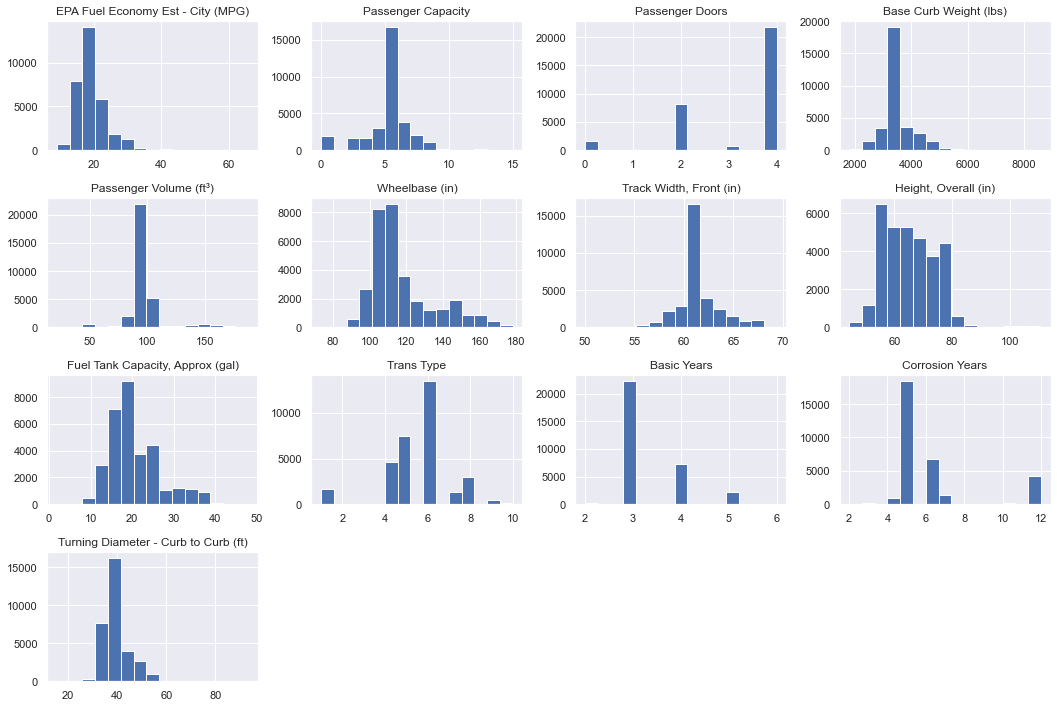

In [58]:
# Take a quick look at histograms of our current numeric features for reference, knowing theres still a lot of work to do
df_cars.hist(bins = 15, figsize = (15, 10))
plt.tight_layout()
plt.show()

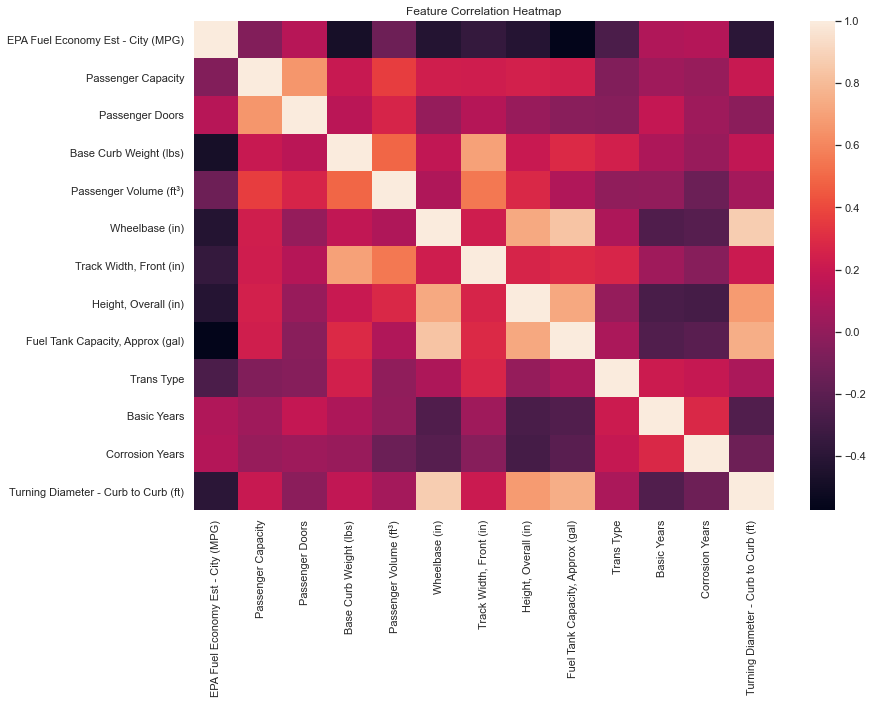

In [59]:
# Do the same for correlations therein
sns.set()

plt.figure(figsize = (13, 9))
sns.heatmap(df_cars.corr())
plt.title('Feature Correlation Heatmap')
plt.show()

The target variable and goal of the project is to predict the price of new cars (the MSRP, or Manufacturer's Suggested Retail Price, feature in the data set).  Intuitively we know that it should be a continous and numeric feature in nature.  So we need to clean and convert it to a float.

In [60]:
df_cars['MSRP'] = df_cars['MSRP'].str.replace('$', '')
df_cars['MSRP'] = df_cars['MSRP'].str.replace(',', '')
df_cars['MSRP'].head()

0    40600
1    45500
2    43600
3    37400
4    42600
Name: MSRP, dtype: object

In [61]:
df_cars['MSRP'] = df_cars['MSRP'].apply(pd.to_numeric, errors = 'coerce')
df_cars['MSRP'].dtypes

dtype('float64')

In [31]:
df_cars['MSRP'].value_counts()

29995.0    64
19995.0    55
25995.0    43
20995.0    40
27995.0    39
           ..
45220.0     1
83890.0     1
79795.0     1
12820.0     1
76400.0     1
Name: MSRP, Length: 10228, dtype: int64

# Feature Extraction and Engineering

Before doing any more EDA proper I want to extract some data from various columns as new features, (for example the make, model, and year from the model each as new unique features).  Also I want to convert a few more categorical features to numeric (SAE net torque and horsepower for example need some more work).

In [20]:
df_cars[['SAE Net Torque @ RPM', 'SAE Net Horsepower @ RPM', 'Displacement']].value_counts()

SAE Net Torque @ RPM  SAE Net Horsepower @ RPM  Displacement
Missing               Missing                   Missing         1993
380 @ 4200            360 @ 5400                6.0L/366         472
360 @ 4000            300 @ 4400                6.0L/364         436
365 @ 3750            300 @ 5000                5.4L/330         379
207 @ 1800-5000       200 @ 5100-6000           2.0L/121         256
                                                                ... 
664 @ 1000            429 @ 3750                4.0 L/241          1
391 @ 3150            349 @ 5500                5.4L/332           1
221 @ 2750-4000       258 @ 6600                3.0L/183           1
                      240 @ 6600                3.0L/182           1
537 @ 6750            759 @ 8500                6.5 L/397          1
Length: 2505, dtype: int64

In [25]:
df_cars['SAE Net Torque @ RPM'].unique()

array(['280 @ 1600', '252 @ 4900', '251 @ 5000', ..., '210 @ 1800',
       '325 @ 3900', '280 @ 1800 - 5000'], dtype=object)

In [26]:
df_cars['Displacement'].unique()

array(['2.0 L/122', '3.5 L/212', '3.5L/212', '2.3L/- TBD -', '2.3L/140',
       '3.0 L/183', '3.7L/224', '3.7L/- TBD -', '3.5L/214', '2.4 L/144',
       '1.5 L/91', '1.5L/91', '2.4L/144', '2.0L/122', '3.5 L/213',
       '3.0L/181', '3.2L/194', 'Missing', '1.7 L/106', '2.9 L/176',
       '5.2 L/317', '4.0 L/243', '4.7L/263', '4.7L/262', '4.3L/262',
       '6.0 L/362', '5.9L/362', '6.0L/362', '2.0 L/121', '3.0 L/181',
       '2.0L/121', '3.0L/183', '4.2L/254', '3.2L/195', '3.2L/191',
       '3.1L/191', '2.7L/163', '4.2L/255', '2.8L/169', '4.0 L/244',
       '4.0L/244', '3.6L/220', '1.8L/109', '3.0L/182', '1.8L/107',
       '5.2L/318', '2.0L/121.1', '3.2L/195.1', '4.2 L/254', '1.8 L/110',
       '2.0 L/120', '2.0L/120', '2.5 L/151', '1.4 L/85', '2.5/151',
       '6.3 L/384', '6.3L/384', '4.0/243', '6.0L/366', '2.9 L/177',
       '4.0 L/241', '6.0 L/363', '6.0 L/366', '6.75L/412',
       '6.75L/- TBD -', '6.8 L/412', '3.0 L/182', '2.5L/152', '2.5/152',
       '3.0/183', '3.2/195', '2.8/170

In [62]:
# Extract just torque and hp from relevant columns so we can convert them to numeric features
df_cars['SAE Net Torque @ RPM'] = df_cars['SAE Net Torque @ RPM'].str.split().str[0]
df_cars['SAE Net Horsepower @ RPM'] = df_cars['SAE Net Horsepower @ RPM'].str.split().str[0]
df_cars[['SAE Net Torque @ RPM', 'SAE Net Horsepower @ RPM']].value_counts()

SAE Net Torque @ RPM  SAE Net Horsepower @ RPM
Missing               Missing                     2007
380                   360                          669
207                   200                          439
360                   300                          436
365                   300                          379
                                                  ... 
191                   186                            1
307                   271                            1
190                   200                            1
375                   350                            1
317                   435                            1
Length: 1525, dtype: int64

In [63]:
df_cars[['SAE Net Torque @ RPM', 'SAE Net Horsepower @ RPM']] = df_cars[['SAE Net Torque @ RPM', 'SAE Net Horsepower @ RPM']].replace('Missing', np.NaN)
df_cars[['SAE Net Torque @ RPM', 'SAE Net Horsepower @ RPM']] = df_cars[['SAE Net Torque @ RPM', 'SAE Net Horsepower @ RPM']].apply(pd.to_numeric, errors = 'coerce')

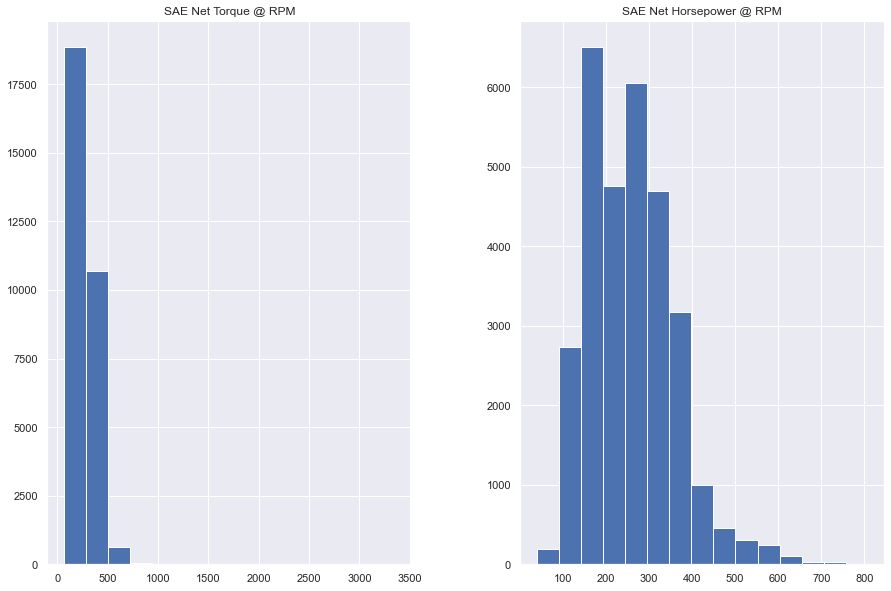

In [64]:
df_cars[['SAE Net Torque @ RPM', 'SAE Net Horsepower @ RPM']].hist(bins = 15, figsize = (15, 10))
plt.show()

In [65]:
df_cars[['SAE Net Torque @ RPM', 'SAE Net Horsepower @ RPM']] = df_cars[['SAE Net Torque @ RPM', 'SAE Net Horsepower @ RPM']].fillna(value = df_cars[['SAE Net Torque @ RPM', 'SAE Net Horsepower @ RPM']].median())

In [66]:
df_cars['Displacement'] = df_cars['Displacement'].replace('Missing', np.NaN)
df_cars['Displacement'] = df_cars['Displacement'].str.slice(0,3)
df_cars['Displacement'].unique()

array(['2.0', '3.5', '2.3', '3.0', '3.7', '2.4', '1.5', '3.2', nan, '1.7',
       '2.9', '5.2', '4.0', '4.7', '4.3', '6.0', '5.9', '4.2', '3.1',
       '2.7', '2.8', '3.6', '1.8', '2.5', '1.4', '6.3', '6.7', '6.8',
       '1.9', '4.4', '4.8', '4.6', '5.0', '39.', '6.6', '5.4', '3.8',
       '5.3', '1.6', '6.2', '5.7', '7.0', '3.4', '2.2', '3.9', '1.2',
       '6.4', '6.1', '3.3', '6.5', '1.3', '4.9', '5.8', '1.0', '7.5',
       '5.6', '4.5', '5.5', '2.6', '2.1'], dtype=object)

In [67]:
df_cars['Displacement'] = df_cars['Displacement'].replace('39.', np.NaN)
df_cars['Displacement'].unique()

array(['2.0', '3.5', '2.3', '3.0', '3.7', '2.4', '1.5', '3.2', nan, '1.7',
       '2.9', '5.2', '4.0', '4.7', '4.3', '6.0', '5.9', '4.2', '3.1',
       '2.7', '2.8', '3.6', '1.8', '2.5', '1.4', '6.3', '6.7', '6.8',
       '1.9', '4.4', '4.8', '4.6', '5.0', '6.6', '5.4', '3.8', '5.3',
       '1.6', '6.2', '5.7', '7.0', '3.4', '2.2', '3.9', '1.2', '6.4',
       '6.1', '3.3', '6.5', '1.3', '4.9', '5.8', '1.0', '7.5', '5.6',
       '4.5', '5.5', '2.6', '2.1'], dtype=object)

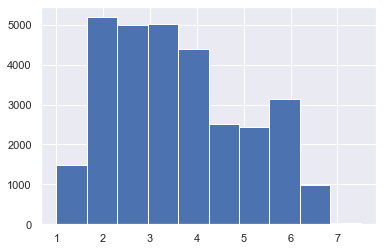

In [68]:
df_cars['Displacement'] = df_cars['Displacement'].apply(pd.to_numeric, errors = 'coerce')
df_cars['Displacement'].hist()
plt.show()

In [69]:
df_cars['Displacement'] = df_cars['Displacement'].fillna(df_cars['Displacement'].median())

In [70]:
df_cars.head()

Model     MSRP  \
0  2019 Acura RDX Specs: FWD w/Technology Pkg  40600.0   
1     2019 Acura RDX Specs: FWD w/Advance Pkg  45500.0   
2      2019 Acura RDX Specs: FWD w/A-Spec Pkg  43600.0   
3                   2019 Acura RDX Specs: FWD  37400.0   
4  2019 Acura RDX Specs: AWD w/Technology Pkg  42600.0   

   EPA Fuel Economy Est - City (MPG)                             Engine  \
0                               22.0  Turbo Premium Unleaded I-4, 2.0 L   
1                               22.0  Turbo Premium Unleaded I-4, 2.0 L   
2                               22.0  Turbo Premium Unleaded I-4, 2.0 L   
3                               22.0  Turbo Premium Unleaded I-4, 2.0 L   
4                               21.0  Turbo Premium Unleaded I-4, 2.0 L   

                 EPA Classification            Style Name         Drivetrain  \
0  Small Sport Utility Vehicles 2WD  FWD w/Technology Pkg  Front Wheel Drive   
1  Small Sport Utility Vehicles 2WD     FWD w/Advance Pkg  Front Wheel Drive   
2  Small Sport Utility Vehicles 2WD      FWD w/A-Spec Pkg  Front Wheel Drive   
3  Small Sport Utility Vehicles 2WD                   FWD  Front Wheel Drive   
4  Small Sport Utility Vehicles 4WD  AWD w/Technology Pkg    All Wheel Drive   

   Passenger Capacity  Passenger Doors     Body Style  ... Basic Years  \
0                   5                4  Sport Utility  ...         4.0   
1                   5                4  Sport Utility  ...         4.0   
2                   5                4  Sport Utility  ...         4.0   
3                   5                4  Sport Utility  ...         4.0   
4                   5                4  Sport Utility  ...         4.0   

   Corrosion Miles/km  Corrosion Years  Drivetrain Miles/km  Drivetrain Years  \
0           Unlimited              5.0               70,000               6.0   
1           Unlimited              5.0               70,000               6.0   
2           Unlimited              5.0               70,000               6.0   
3           Unlimited              5.0               70,000               6.0   
4           Unlimited              5.0               70,000               6.0   

   Turning Diameter - Curb to Curb (ft)  Front Wheel Material  \
0                                  39.0              Aluminum   
1                                  39.0              Aluminum   
2                                  39.0              Aluminum   
3                                  39.0              Aluminum   
4                                  39.0              Aluminum   

   Front Tire Size Roadside Assistance Years  Roadside Assistance Miles/km  
0      P235/55HR19                       4.0                        50,000  
1      P235/55HR19                       4.0                        50,000  
2      P255/45VR20                       4.0                        50,000  
3      P235/55HR19                       4.0                        50,000  
4      P235/55HR19                       4.0                        50,000  

[5 rows x 56 columns]

In [51]:
df_cars['Model'].sample(50)

1299     2011 Audi A3 Specs: 4-Door HB S tronic FrontTr...
2879      2009 BMW 6-Series Specs: 2-Door Convertible 650i
3804          2009 Cadillac Escalade ESV Specs: AWD 4-Door
19821    2007 Maserati Quattroporte Specs: 4-Door Sedan...
23076         2016 Nissan Titan Specs: 2WD Crew Cab SV Gas
16815         2015 INFINITI Q70 Specs: 4-Door Sedan V6 AWD
24752     1991 Porsche 911 Specs: 2-Door Coupe 2 Tiptronic
4718     2016 Chevrolet Corvette Specs: 2-Door Stingray...
19838    2016 Mazda MAZDA3 Specs: 5-Door HB Automatic i...
5988            2000 Chevrolet Suburban Specs: 2500 4WD LT
12150    2009 GMC Sierra 1500 Specs: 4WD Ext Cab 143.5"...
29115    2008 Toyota Camry Specs: 4-Door Sedan I4 Manua...
3809          2006 Cadillac Escalade ESV Specs: 4-Door AWD
19926    2011 Mazda MAZDA3 Specs: 5-Door HB Automatic s...
24353     2016 Porsche Panamera Specs: 4-Door HB 4 Edition
8350           2013 Ford F-150 Specs: 4WD SuperCab 163" XL
16321    2014 Hyundai Sonata Specs: 4-Door Sedan 2.0T A.

In [71]:
df_cars['Model Year'] = df_cars['Model'].str.split().str[0]
df_cars['Manufacturer'] = df_cars['Model'].str.split().str[1]
df_cars['Car Model'] = df_cars['Model'].str.split().str[2]

In [72]:
df_cars.shape

(32316, 59)

In [73]:
df_cars.head()

Model     MSRP  \
0  2019 Acura RDX Specs: FWD w/Technology Pkg  40600.0   
1     2019 Acura RDX Specs: FWD w/Advance Pkg  45500.0   
2      2019 Acura RDX Specs: FWD w/A-Spec Pkg  43600.0   
3                   2019 Acura RDX Specs: FWD  37400.0   
4  2019 Acura RDX Specs: AWD w/Technology Pkg  42600.0   

   EPA Fuel Economy Est - City (MPG)                             Engine  \
0                               22.0  Turbo Premium Unleaded I-4, 2.0 L   
1                               22.0  Turbo Premium Unleaded I-4, 2.0 L   
2                               22.0  Turbo Premium Unleaded I-4, 2.0 L   
3                               22.0  Turbo Premium Unleaded I-4, 2.0 L   
4                               21.0  Turbo Premium Unleaded I-4, 2.0 L   

                 EPA Classification            Style Name         Drivetrain  \
0  Small Sport Utility Vehicles 2WD  FWD w/Technology Pkg  Front Wheel Drive   
1  Small Sport Utility Vehicles 2WD     FWD w/Advance Pkg  Front Wheel Drive   
2  Small Sport Utility Vehicles 2WD      FWD w/A-Spec Pkg  Front Wheel Drive   
3  Small Sport Utility Vehicles 2WD                   FWD  Front Wheel Drive   
4  Small Sport Utility Vehicles 4WD  AWD w/Technology Pkg    All Wheel Drive   

   Passenger Capacity  Passenger Doors     Body Style  ...  \
0                   5                4  Sport Utility  ...   
1                   5                4  Sport Utility  ...   
2                   5                4  Sport Utility  ...   
3                   5                4  Sport Utility  ...   
4                   5                4  Sport Utility  ...   

  Drivetrain Miles/km  Drivetrain Years  Turning Diameter - Curb to Curb (ft)  \
0              70,000               6.0                                  39.0   
1              70,000               6.0                                  39.0   
2              70,000               6.0                                  39.0   
3              70,000               6.0                                  39.0   
4              70,000               6.0                                  39.0   

   Front Wheel Material  Front Tire Size  Roadside Assistance Years  \
0              Aluminum      P235/55HR19                        4.0   
1              Aluminum      P235/55HR19                        4.0   
2              Aluminum      P255/45VR20                        4.0   
3              Aluminum      P235/55HR19                        4.0   
4              Aluminum      P235/55HR19                        4.0   

   Roadside Assistance Miles/km  Model Year Manufacturer  Car Model  
0                        50,000        2019        Acura        RDX  
1                        50,000        2019        Acura        RDX  
2                        50,000        2019        Acura        RDX  
3                        50,000        2019        Acura        RDX  
4                        50,000        2019        Acura        RDX  

[5 rows x 59 columns]

In [74]:
df_cars['EPA Classification'].unique()

array(['Small Sport Utility Vehicles 2WD',
       'Small Sport Utility Vehicles 4WD', 'Sport Utility Vehicle',
       '4WD Sport Utility Vehicle', '2WD Sport Utility Vehicle',
       'Special Purpose Vehicle', 'Mid-Size Cars', 'Compact Cars',
       'Missing', 'Two-Seaters', 'Two Seater', 'Minicompact Cars',
       'Subcompact', 'Mini-compact', 'Minicompact', 'Midsize Cars',
       'Midsize Station Wagon', 'Midsize', 'Midsize Car', 'Midsize S/W',
       'Small Station Wagon', 'Mid-Size', 'Compact', 'Small',
       'Subcompact Cars', 'Sub-Compact',
       'Standard Sport Utility Vehicles 4WD',
       'Sport Utility Vehicle - 4WD', 'Small Station Wagons',
       'Small Station Wgn', 'Sub Compact Cars', 'Two seaters',
       'Two seater', 'Mini-Compact', 'Two-Seater', 'Large Cars', 'Large',
       'Two Seaters', 'Mid-Size Station Wagon',
       'Standard Sport Utility Vehicles 2WD', 'Light-Duty Truck',
       'Large Car', 'Mid-Size Wagon', 'large', 'Mid Size', 'Compact Car',
       'FWD S

In [75]:
df_cars['Engine'].unique()

array(['Turbo Premium Unleaded I-4, 2.0 L', 'Premium Unleaded V-6, 3.5 L',
       'Gas V6, 3.5L', 'Turbocharged Gas I4, 2.3L', 'Gas I4, 2.3L',
       'Gas/Electric V-6, 3.0 L', 'Gas V6, 3.7L',
       'Premium Unleaded I-4, 2.4 L', 'Premium Unleaded I-4, 2.0 L',
       'Gas/Electric I-4, 1.5 L', 'Gas/Electric I4, 1.5L', 'Gas I4, 2.4L',
       'Gas I4, 2.0L', 'Twin Turbo Gas/Electric V-6, 3.5 L',
       'Gas V6, 3.0L', 'Gas V6, 3.2L', 'Missing',
       'Gas/Electric V-6, 3.5 L',
       'Intercooled Turbo Premium Unleaded I-4, 1.7 L',
       'Intercooled Turbo Premium Unleaded I-4, 2.0 L',
       'Twin Turbo Premium Unleaded V-6, 2.9 L',
       'Twin Turbo Premium Unleaded V-12, 5.2 L',
       'Twin Turbo Premium Unleaded V-8, 4.0 L', 'Gas V8, 4.7L',
       'Gas V8, 4.3L', 'Premium Unleaded V-12, 6.0 L', 'Gas V12, 5.9L',
       'Gas V12, 6.0L', 'Intercooled Turbo Gas/Electric V-6, 3.0 L',
       'Intercooled Supercharger Premium Unleaded V-6, 3.0 L',
       'Intercooled Turbo Diesel V-6, 

In [225]:
df_cars['Engine'].value_counts()

Missing                                          1975
Gas I4, 2.0L                                     1050
Gas V8, 6.0L                                     1025
Gas V6, 3.5L                                     1011
Intercooled Turbo Premium Unleaded I-4, 2.0 L     964
                                                 ... 
Gas V6, 2.3L                                        1
Gas I6, 2.9L                                        1
Gas Flat 6-cyl, 4.0L                                1
Supercharged Gas/Electric V6, 3.0                   1
Gas I6, 3.6L                                        1
Name: Engine, Length: 453, dtype: int64

In [76]:
df_cars['Style Name'].unique()

array(['FWD w/Technology Pkg', 'FWD w/Advance Pkg', 'FWD w/A-Spec Pkg',
       ..., '4dr 2.5L Turbo AWD w/Sunroof', '4dr 2.5L Turbo AWD',
       'T5 AWD Platinum'], dtype=object)

In [77]:
df_cars['Drivetrain'].unique()

array(['Front Wheel Drive', 'All Wheel Drive', '4 Wheel Drive',
       'Rear Wheel Drive', 'Missing', 'All-Wheel Drive',
       'Front-Wheel Drive', 'All wheel drive', 'All-wheel drive', 'AWD',
       'Four Wheel Drive', '2WD', '4-Wheel Drive', 'RWD',
       'REAR WHEEL DRIVE', '4WD', 'Four-Wheel Drive', 'Rear wheel drive',
       'Front wheel drive', 'Front-wheel drive', 'Rear-Wheel Drive',
       'Four wheel drive', '2-Wheel Drive', '2 Wheel Drive',
       '4-wheel Drive'], dtype=object)

In [79]:
df_cars['Body Style'].unique()

array(['Sport Utility', '4dr Car', '2dr Car', 'Convertible', 'Missing',
       'Station Wagon', 'Crew Cab Pickup - Short Bed',
       'Regular Cab Pickup - Long Bed',
       'Extended Cab Pickup - Standard Bed',
       'Crew Cab Pickup - Standard Bed',
       'Regular Cab Pickup - Standard Bed',
       'Extended Cab Pickup - Long Bed',
       'Extended Cab Pickup - Short Bed',
       'Regular Cab Pickup - Short Bed', 'Regular Cab Chassis-Cab',
       'Crew Cab Pickup - Long Bed', 'Full-size Passenger Van',
       'Mini-van, Cargo', 'Mini-van, Passenger', 'Extended Cab Pickup',
       'Full-size Cargo Van', 'Specialty Vehicle', '3dr Car', 'Hatchback',
       'Crew Cab Pickup'], dtype=object)

In [114]:
df_cars[df_cars['Body Style'] == 'Specialty Vehicle']

Model     MSRP  \
11781  2019 Ford Transit Cutaway Specs: T-250 SRW 138...  29410.0   
11782  2019 Ford Transit Cutaway Specs: T-350 SRW 156...  30380.0   
11783  2019 Ford Transit Cutaway Specs: T-350 SRW 138...  30180.0   
11784  2019 Ford Transit Cutaway Specs: T-350 DRW 178...  32330.0   
11785  2019 Ford Transit Cutaway Specs: T-350 DRW 178...  32580.0   
...                                                  ...      ...   
25746       2014 Ram ProMaster Specs: 3500 159" Low Roof  26660.0   
25747  2014 Ram ProMaster Specs: 3500 136" WB, 81" CA...  26530.0   
25748       2014 Ram ProMaster Specs: 3500 136" Low Roof  26030.0   
25752  2014 Ram ProMaster Specs: 2500 136" WB, 81" CA...  27035.0   
25753       2014 Ram ProMaster Specs: 2500 136" Low Roof  26460.0   

       EPA Fuel Economy Est - City (MPG)                       Engine  \
11781                               18.0  Regular Unleaded V-6, 3.7 L   
11782                               18.0  Regular Unleaded V-6, 3.7 L   
11783                               18.0  Regular Unleaded V-6, 3.7 L   
11784                               18.0  Regular Unleaded V-6, 3.7 L   
11785                               18.0  Regular Unleaded V-6, 3.7 L   
...                                  ...                          ...   
25746                               18.0  Regular Unleaded V-6, 3.6 L   
25747                               18.0  Regular Unleaded V-6, 3.6 L   
25748                               18.0  Regular Unleaded V-6, 3.6 L   
25752                               18.0  Regular Unleaded V-6, 3.6 L   
25753                               18.0  Regular Unleaded V-6, 3.6 L   

      EPA Classification                                 Style Name  \
11781            Missing                T-250 SRW 138" WB 9000 GVWR   
11782            Missing                T-350 SRW 156" WB 9500 GVWR   
11783            Missing                T-350 SRW 138" WB 9500 GVWR   
11784            Missing                T-350 DRW 178" WB 9950 GVWR   
11785            Missing               T-350 DRW 178" WB 10360 GVWR   
...                  ...                                        ...   
25746            Missing                         3500 159" Low Roof   
25747            Missing  3500 136" WB, 81" CA Low Roof *Ltd Avail*   
25748            Missing             3500 136" Low Roof *Ltd Avail*   
25752            Missing              2500 136" WB, 81" CA Low Roof   
25753            Missing                         2500 136" Low Roof   

              Drivetrain  Passenger Capacity  Passenger Doors  \
11781   Rear Wheel Drive                   2                2   
11782   Rear Wheel Drive                   2                2   
11783   Rear Wheel Drive                   2                2   
11784   Rear Wheel Drive                   2                2   
11785   Rear Wheel Drive                   2                2   
...                  ...                 ...              ...   
25746  Front Wheel Drive                   2                2   
25747  Front Wheel Drive                   2                2   
25748  Front Wheel Drive                   2                2   
25752  Front Wheel Drive                   2                2   
25753  Front Wheel Drive                   2                2   

              Body Style  ... Front Tire Size  Roadside Assistance Years  \
11781  Specialty Vehicle  ...    LT235/65SR16                        5.0   
11782  Specialty Vehicle  ...    LT235/65SR16                        5.0   
11783  Specialty Vehicle  ...    LT235/65SR16                        5.0   
11784  Specialty Vehicle  ...    LT195/75SR16                        5.0   
11785  Specialty Vehicle  ...    LT195/75SR16                        5.0   
...                  ...  ...             ...                        ...   
25746  Specialty Vehicle  ...     LT225/75R16                        5.0   
25747  Specialty Vehicle  ...      P225/75R16                        5.0   
25748  Specialty Vehicle  .

In [96]:
df_cars['Engine Type'] = ''
df_cars.columns.get_loc('Engine Type')

59

In [124]:
inline_3 = ['I3', 'I-3']
inline_4 = ['I4', 'I-4', '4-Cyl', '4-cyl', 'i4', 'L4']
flat_4 = ['H-4', 'Flat 4', 'Flat 4 Cyl' ]
inline_5 = ['I5', 'I-5', '5-Cyl']
v_6 = ['V6', 'V-6', '6 Cyl']
inline_6 = ['6-Cyl', 'I6', 'I-6']
flat_6 = ['H-6', 'Flat 6', 'Flat 6-cyl']
v_8 = ['V8', 'V-8', 'W8']
v_10 = ['V10', 'V-10']
v_12 = ['V12', 'V-12']
w_12 = ['W12', 'W-12']

for index, car in enumerate(df_cars['Engine']):
    if any(engine in car for engine in inline_3):
        df_cars.iloc[index, 59] = 'I3'
    elif any(engine in car for engine in inline_4):
        df_cars.iloc[index, 59] = 'I4'
    elif any(engine in car for engine in flat_4):
        df_cars.iloc[index, 59] = 'Flat 4'
    elif any(engine in car for engine in inline_5):
        df_cars.iloc[index, 59] = 'I5'
    elif any(engine in car for engine in v_6):
        df_cars.iloc[index, 59] = 'V6'
    elif any(engine in car for engine in inline_6):
        df_cars.iloc[index, 59] = 'I6'
    elif any(engine in car for engine in flat_6):
        df_cars.iloc[index, 59] = 'Flat 6'
    elif any(engine in car for engine in v_8):
        df_cars.iloc[index, 59] = 'V8'
    elif any(engine in car for engine in v_10):
        df_cars.iloc[index, 59] = 'V10'
    elif any(engine in car for engine in v_12):
        df_cars.iloc[index, 59] = 'V12'
    elif any(engine in car for engine in w_12):
        df_cars.iloc[index, 59] = 'W12'
    
        
df_cars['Engine Type'].sample(10)

22743    V6
13598    V8
19493    V6
659      V6
7616     I4
16806    V6
21853    I4
20399    I4
12758    V8
3768     V8
Name: Engine Type, dtype: object

In [138]:
df_cars['Front Tire Size'].unique()

array(['P235/55HR19', 'P255/45VR20', 'P235/60VR18', 'P235/55VR18',
       'P235/55R18', 'P245/60HR18', 'P245/50HR20', 'P265/45HR20',
       'P245/55HR19', 'P255/55HR18', 'P255/50HR19', 'P235/65R17',
       'P225/55HR17', 'P225/50HR18', 'P245/40VR19', 'P225/55VR17',
       'P225/50VR18', 'P215/45VR17', 'P225/40VR18', 'P205/55HR16',
       'P245/35YR19', 'P215/40ZR17', 'P215/40YR17', 'P215/45ZR16',
       'Missing', 'P245/40WR19', 'P245/45VR18', 'P205/45YR17',
       'P205/40YR18', 'P225/50YR17', 'P225/40YR19', 'P225/45YR18',
       'P255/45YR20', 'P235/60HR18', 'P255/45HR20', 'P255/40ZR20',
       'P255/40YR20', 'P235/40ZR19', 'P235/45ZR18', 'P255/35YR20',
       'P255/40ZR19', 'P245/35R20', 'P245/45HR19', 'P245/45HR18',
       'P255/40HR19', 'P225/55R17', 'P245/45R18', '225/55R17',
       '245/45R18', 'P245/40R18', 'P245/45R17', 'P245/45R17 AS',
       'P245/40R18 AS', 'P225/55R16', 'P245/45HR17', 'P225/55HR16',
       'P215/55HR16', 'P235/45R17', 'P235/50HR16', '18"', 'P215/55R16',
  

In [139]:
df_cars['Front Tire Size'].value_counts()

Missing         1988
P265/70R17       701
P205/55HR16      601
LT245/75R16      502
LT245/75R16E     430
                ... 
P265/40ZR20        1
P265/YR20          1
P255/55R19         1
P295/45R18         1
P255/50ZR17        1
Name: Front Tire Size, Length: 865, dtype: int64

In [102]:
df_cars['Front Tire Width'] = ''
df_cars['Front Tire Aspect Ratio'] = ''
df_cars['Front Wheel Size'] = ''
df_cars.columns.get_loc('Front Tire Size')

53

In [150]:
import re
tire1 = 'LT245/75R16E'
tire2 = '185/60R15C, 95/92T TL'
tire1_test = re.sub(r'[a-zA-Z]', '', tire1)
tire2_test = re.sub(r'[a-zA-Z]', '', tire2)
print(tire1_test)
print(tire2_test)

245/7516
185/6015, 95/92 


In [163]:
df_cars_copy = df_cars.copy()
df_cars['Front Tire Size'].replace('Missing', np.NaN, inplace = True)
df_cars['Front Tire Size'] = df_cars['Front Tire Size'].str.replace(r"[a-zA-Z]", '')
df_cars['Front Tire Size'].sample(20)

6390     265/7017
6157     245/7517
3097     225/5517
7156     265/5020
28228    245/7516
15766    235/6018
18746    235/6018
1835     225/4517
1577     255/3519
30360    195/6515
16490    205/6016
23629    225/5018
6736     255/7017
15540    195/6515
8793     235/7017
13502    245/7516
1127          NaN
25615    265/7017
27923    215/5517
28838    245/6517
Name: Front Tire Size, dtype: object

In [168]:
df_cars['Front Tire Width'] = df_cars['Front Tire Size'].str.slice(0,3)
df_cars['Front Tire Aspect Ratio'] = df_cars['Front Tire Size'].str.slice(4,6) 
df_cars['Front Wheel Size'] = df_cars['Front Tire Size'].str.slice(6,8)
df_cars.head()

Model     MSRP  \
0  2019 Acura RDX Specs: FWD w/Technology Pkg  40600.0   
1     2019 Acura RDX Specs: FWD w/Advance Pkg  45500.0   
2      2019 Acura RDX Specs: FWD w/A-Spec Pkg  43600.0   
3                   2019 Acura RDX Specs: FWD  37400.0   
4  2019 Acura RDX Specs: AWD w/Technology Pkg  42600.0   

   EPA Fuel Economy Est - City (MPG)                             Engine  \
0                               22.0  Turbo Premium Unleaded I-4, 2.0 L   
1                               22.0  Turbo Premium Unleaded I-4, 2.0 L   
2                               22.0  Turbo Premium Unleaded I-4, 2.0 L   
3                               22.0  Turbo Premium Unleaded I-4, 2.0 L   
4                               21.0  Turbo Premium Unleaded I-4, 2.0 L   

                 EPA Classification            Style Name Drivetrain  \
0  Small Sport Utility Vehicles 2WD  FWD w/Technology Pkg        FWD   
1  Small Sport Utility Vehicles 2WD     FWD w/Advance Pkg        FWD   
2  Small Sport Utility Vehicles 2WD      FWD w/A-Spec Pkg        FWD   
3  Small Sport Utility Vehicles 2WD                   FWD        FWD   
4  Small Sport Utility Vehicles 4WD  AWD w/Technology Pkg        AWD   

   Passenger Capacity  Passenger Doors Body Style  ... Front Tire Size  \
0                   5                4        SUV  ...        235/5519   
1                   5                4        SUV  ...        235/5519   
2                   5                4        SUV  ...        255/4520   
3                   5                4        SUV  ...        235/5519   
4                   5                4        SUV  ...        235/5519   

   Roadside Assistance Years  Roadside Assistance Miles/km  Model Year  \
0                        4.0                        50,000        2019   
1                        4.0                        50,000        2019   
2                        4.0                        50,000        2019   
3                        4.0                        50,000        2019   
4                        4.0                        50,000        2019   

   Manufacturer  Car Model  Engine Type  Front Tire Width  \
0         Acura        RDX           I4               235   
1         Acura        RDX           I4               235   
2         Acura        RDX           I4               255   
3         Acura        RDX           I4               235   
4         Acura        RDX           I4               235   

  Front Tire Aspect Ratio  Front Wheel Size  
0                      55                19  
1                      55                19  
2                      45                20  
3                      55                19  
4                      55                19  

[5 rows x 63 columns]

In [117]:
df_cars.columns.get_loc('Body Style')

9

In [119]:
van = ['Mini-van', 'Van']
truck = ['Pickup', 'Cab']

for index, value in enumerate(df_cars['Body Style']):
    if 'Car' in value:
        df_cars.iloc[index, 9] = 'Car'
    elif 'Sport Utility' in value:
        df_cars.iloc[index, 9] = 'SUV'
    elif 'Convertible' in value:
        df_cars.iloc[index, 9] = 'Convertible'
    elif 'Wagon' in value:
        df_cars.iloc[index, 9] = 'Station Wagon'
    elif 'Hatch' in value:
        df_cars.iloc[index, 9] = 'Hatchback'
    elif any(style in value for style in van):
        df_cars.iloc[index, 9] = 'Van'
    elif any(style in value for style in truck):
        df_cars.iloc[index, 9] = 'Truck'


    

Model     MSRP  \
1691    2018 BMW 3-Series Specs: 340i Sedan South Africa  48950.0   
6460   2007 Chevrolet Silverado 2500HD Specs: 2WD Reg...  23675.0   
28424  1995 Toyota Tacoma Specs: Reg Cab 2.4L I4 Auto...  12568.0   
7019   2008 Chrysler 300 Specs: 4-Door Sedan 300C Hem...  36215.0   
18343  1995 Kia Sportage Specs: 4-Door 2.0L DOHC Auto...  17195.0   
21752  1994 Mitsubishi Mirage Specs: 2-Door Coupe ES ...  11059.0   
28734            2019 Toyota Highlander Specs: LE V6 AWD  35040.0   
5202   2008 Chevrolet Colorado Specs: 2WD Reg Cab 111...  15085.0   
29485  2004 Toyota Sienna Specs: 5-Door LE FWD 7-Pass...  24480.0   
6047   1990 Chevrolet Suburban Specs: V2500 Panel Doo...  20493.0   
11066  2005 Ford Super Duty F-250 Specs: Supercab 158...  29480.0   
24803  2019 Ram 1500 Specs: Longhorn 4x2 Crew Cab 5'7...  50640.0   
736    2005 Audi S4 Specs: 4-Door Sedan quattro Autom...  47050.0   
6955      2014 Chrysler 300 Specs: 4-Door Sedan 300C AWD  39895.0   
16646  1996 Hyundai Accent Specs: 4-Door Sedan Automatic  10230.0   
18214             2014 Kia Sportage Specs: 2WD 4-Door LX  21600.0   
14546                2006 Honda Civic Coupe Specs: EX MT  18460.0   
13749      2000 GMC Savana Passenger Specs: 3500 135" WB  26123.0   
21468  2011 Mercedes-Benz S Class Specs: 4-Door Sedan...  93000.0   
1210   2011 Audi A5 Specs: 2-Door Coupe Manual quattr...  36900.0   

       EPA Fuel Economy Est - City (MPG)  \
1691                                21.0   
6460                                18.0   
28424                               18.0   
7019                                15.0   
18343                               18.0   
21752                               18.0   
28734                               19.0   
5202                                18.0   
29485                               19.0   
6047                                18.0   
11066                               18.0   
24803                               20.0   
736                                 18.0   
6955                                18.0   
16646                               18.0   
18214                               21.0   
14546                               30.0   
13749                               18.0   
21468                               15.0   
1210                                21.0   

                                              Engine  \
1691   Intercooled Turbo Premium Unleaded I-6, 3.0 L   
6460                                    Gas V8, 6.0L   
28424                                        Missing   
7019                                    Gas V8, 5.7L   
18343                                        Missing   
21752                                        Missing   
28734                    Regular Unleaded V-6, 3.5 L   
5202                                 Gas 4-Cyl, 2.9L   
29485                                   Gas V6, 3.3L   
6047                                         Missing   
11066                                   Gas V8, 5.4L   
24803                        Gas/Electric V-6, 3.6 L   
736                                     Gas V8, 4.2L   
6955                     Regular Unleaded V-6, 3.6 L   
16646                                        Missing   
18214                    Regular Unleaded I-4, 2.4 L   
14546                                   Gas I4, 1.8L   
13749                                   Gas V8, 5.7L   
21468                                   Gas V8, 5.5L   
1210                                    Gas I4, 2.0L   

                     EPA Classification                           Style Name  \
1691                       Compact Cars                   Sedan South Africa   
6460                            Missing  2WD Regular Cab Long Box Work Truck   
28424                           Missing                 Reg Cab 2.4L I4 Auto   
7019                              Large                4dr Sdn 300C Hemi RWD   
18343                           Missing            4dr 2.0L DOHC Auto 4WD EX   
21752              

In [120]:
df_cars['Body Style'].value_counts()

Car                  11726
Truck                 7750
SUV                   7719
Missing               1716
Convertible           1416
Station Wagon         1046
Van                    829
Specialty Vehicle      102
Hatchback               12
Name: Body Style, dtype: int64

In [121]:
df_cars['Drivetrain'].unique()

array(['Front Wheel Drive', 'All Wheel Drive', '4 Wheel Drive',
       'Rear Wheel Drive', 'Missing', 'All-Wheel Drive',
       'Front-Wheel Drive', 'All wheel drive', 'All-wheel drive', 'AWD',
       'Four Wheel Drive', '2WD', '4-Wheel Drive', 'RWD',
       'REAR WHEEL DRIVE', '4WD', 'Four-Wheel Drive', 'Rear wheel drive',
       'Front wheel drive', 'Front-wheel drive', 'Rear-Wheel Drive',
       'Four wheel drive', '2-Wheel Drive', '2 Wheel Drive',
       '4-wheel Drive'], dtype=object)

In [122]:
df_cars.columns.get_loc('Drivetrain')

6

In [123]:
all_wheel = ['All', 'AWD']
four_wheel = ['4', 'Four']
front_wheel = ['Front', '2WD', '2']
rear_wheel = ['Rear', 'RWD']

for index, value in enumerate(df_cars['Drivetrain']):
    if any(drive in value for drive in all_wheel):
        df_cars.iloc[index, 6] = 'AWD'
    elif any(drive in value for drive in four_wheel):
        df_cars.iloc[index, 6] = '4WD'
    elif any(drive in value for drive in front_wheel):
        df_cars.iloc[index, 6] = 'FWD'
    elif any(drive in value for drive in rear_wheel):
        df_cars.iloc[index, 6] = 'RWD'
        

In [126]:
df_cars.sample(10)

Model     MSRP  \
32090     2009 Volvo S60 Specs: 4-Door Sedan 2.5T SE FWD  30950.0   
15273  2012 Honda Accord Sedan Specs: 4-Door I4 Autom...  22280.0   
10190               2010 Ford Edge Specs: 4-Door SEL FWD  30420.0   
2266                 2018 BMW 5-Series Specs: 540i Sedan  58200.0   
32108  2007 Volvo S60 Specs: 4-Door Sedan 2.5L Turbo ...  38985.0   
31387  1997 Volkswagen Golf Specs: 2-Door HB Base Aut...  16320.0   
21244  2012 Mercedes-Benz E Class Specs: 4-Door Wagon...  57150.0   
24896        2016 Ram 1500 Specs: 4WD Reg Cab 120.5" SLT  35775.0   
5998                 1999 Chevrolet Suburban Specs: 2500  27359.0   
9856   1998 Ford Explorer Specs: 2-Door 102" WB Sport...  22725.0   

       EPA Fuel Economy Est - City (MPG)  \
32090                               19.0   
15273                               23.0   
10190                               18.0   
2266                                21.0   
32108                               18.0   
31387                               22.0   
21244                               19.0   
24896                               16.0   
5998                                18.0   
9856                                16.0   

                                              Engine  \
32090                Low-Pressure Turbo Gas I5, 2.5L   
15273                                   Gas I4, 2.4L   
10190                                   Gas V6, 3.5L   
2266   Intercooled Turbo Premium Unleaded I-6, 3.0 L   
32108                             Turbo Gas I5, 2.5L   
31387                                   Gas I4, 2.0L   
21244                                   Gas V6, 3.5L   
24896                    Regular Unleaded V-6, 3.6 L   
5998                                    Gas V8, 5.7L   
9856                                    Gas V6, 4.0L   

              EPA Classification                          Style Name  \
32090                    Compact                 4dr Sdn 2.5T SE FWD   
15273                      Large             LX Automatic PZEV Sedan   
10190  2WD Sport Utility Vehicle                         4dr SEL FWD   
2266               Mid-Size Cars                               Sedan   
32108                    Compact  4dr Sdn 2.5L Turbo AT R AWD w/Snrf   
31387                    Compact                    2dr HB Base Auto   
21244     Midsize Station Wagons           E 350 4MATIC Luxury Wagon   
24896                    Missing      4WD Regular Cab 6.4 Ft Box SLT   
5998                     Missing                                2500   
9856                     Missing               2dr 102" WB Sport 4WD   

      Drivetrain  Passenger Capacity  Passenger Doors     Body Style  ...  \
32090        FWD                   5                4            Car  ...   
15273        FWD                   5                4            Car  ...   
10190        FWD                   5                4            Car  ...   
2266         RWD                   5                4            Car  ...   
32108        AWD                   5                4            Car  ...   
31387        FWD                   4                2            Car  ...   
21244        AWD                   5                4  Station Wagon  ...   
24896        4WD                   3                2          Truck  ...   
5998         RWD                   3                4            SUV  ...   
9856         4WD                   4                2            SUV  ...   

      Front Tire Size  Roadside Assistance Years  \
32090      P235/45R17                        4.0   
15273     P215/60HR16                    Missing   
10190      P245/60R18                        5.0   
2266      P245/45HR18                        4.0   
32108      235/45ZR17                        4.0   
31387      P195/60R14                        2.0   
21244      P245/45R17                  Unlimited   
24896     P265/70SR17                        5.0   
5998     LT245/75R16E                        3.0   
9856       P235/75R15       

In [127]:
df_cars.dtypes

Model                                 object
MSRP                                 float64
EPA Fuel Economy Est - City (MPG)    float64
Engine                                object
EPA Classification                    object
                                      ...   
Car Model                             object
Engine Type                           object
Front Tire Width                      object
Front Tire Aspect Ratio               object
Front Wheel Size                      object
Length: 63, dtype: object

In [130]:
col_list = ['Trans Type', 'Brake Type', 'Steering Type', 'Fuel System', 'Trans Description Cont.', 'Suspension Type - Front', 'Suspension Type - Rear']
df_cars[col_list].nunique()

Trans Type                  10
Brake Type                  18
Steering Type              100
Fuel System                 63
Trans Description Cont.     60
Suspension Type - Front    143
Suspension Type - Rear     222
dtype: int64

In [131]:
df_cars['Trans Type'].unique()

array([10.,  6.,  5.,  9.,  7.,  8.,  1.,  4.,  2.,  3.])

In [132]:
df_cars['Brake Type'].unique()

array(['4-Wheel Disc', 'Pwr', 'Pwr-Assisted', 'Missing', 'Power',
       'Pwr Regenerative', 'Hydraulic', 'Regenerative', 'Pwr Assisted',
       'Pwr w/Hydroboost', 'Partially Regenerative',
       'Front Disc/Rear Drum', 'Front disc/rear drum',
       'Front & rear disc', 'Vacuum-assisted', 'pwr', 'Pwr Rack & Pinion',
       'Pwr-assisted'], dtype=object)

In [223]:
df_cars['Brake Type'].value_counts()

Pwr                       14866
4-Wheel Disc               9080
Power                      4211
Missing                    2035
Pwr-Assisted               1440
Front Disc/Rear Drum        504
Hydraulic                    83
Pwr Regenerative             41
Regenerative                 13
Pwr w/Hydroboost             10
Pwr-assisted                  7
pwr                           6
Pwr Assisted                  5
Vacuum-assisted               4
Front disc/rear drum          4
Front & rear disc             4
Partially Regenerative        2
Pwr Rack & Pinion             1
Name: Brake Type, dtype: int64

In [133]:
df_cars['Steering Type'].unique()

array(['Rack-Pinion', 'Electric Rack & Pinion',
       'Variable Pwr Rack & Pinion', 'Variable Pwr', 'Pwr Rack & Pinion',
       'Missing', 'Speed Sensitive Pwr Rack & Pinion',
       'Speed sensitive pwr rack & pinion', 'Servotronic',
       'Servotronic Speed-Sensitive', 'Pwr rack & pinion',
       'Speed-Sensitive', 'Pwr', 'Speed-Sensitive Pwr',
       'Speed-Sensitive Pwr Rack & Pinion', 'Variable Assist Pwr',
       'Electric', 'Servotronic Pwr Assist', 'Power Rack & Pinion',
       'Servotronic Variable Pwr', 'M Servotronic Variable Pwr',
       'Speed-sensitive pwr', 'Pwr Recirculating Ball',
       'Pwr Rack & Pinion Steering', 'Pwr Rack and Pinion',
       'Pwr Variable', 'Variable Effort Pwr', 'Variable-Effort Pwr',
       'Power', 'Electric Rack-&-Pinion', 'Electric Power Steering',
       'Pwr-assisted', '4-Wheel Pwr Rack & Pinion',
       'Electric Variable-Effort Power', 'Pwr Speed Sensitive',
       'Power Speed Sensitive', 'Electric Pwr', 'Variable pwr assist',
       '

In [134]:
df_cars['Fuel System'].unique()

array(['Gasoline Direct Injection', 'Sequential MPI',
       'Electronic Fuel Injection', 'Direct Injection', 'DI', 'PGM-FI',
       'PGM-FI MPI', 'Port/Direct Injection', 'Missing', 'MPFI', 'MPI',
       'SEFI', 'Diesel Direct Injection', 'FSI', 'Direct injection',
       'Direct', 'TDI', 'SDI', 'FSI Direct', 'TFSI Direct',
       'DOHC FSI Direct', 'TFSI', 'SI', 'SMPI', 'SFI', 'EFI', 'GDI',
       'HPI', 'FI', 'Sequential MPI (injection)',
       'Electronic fuel injection', 'SIDI', 'Direct Gasoline Injection',
       'PFI', 'MFI', 'Sequential Fuel Injection', 'Electric',
       'SFI FlexFuel', 'SPFI', 'SMFI', 'SPI', 'Turbo-Charged DI',
       'Turbo-Charged OHV', 'Hydrogen', 'Supercharged SPFI',
       'Supercharged EFI', 'DIS', 'SFI/DI', 'SMPFI', 'DISI', 'EMPI',
       'Electronic Fuel Injectino', 'CRD', 'CDI', 'Turbocharged EMFI',
       'Turbocharged EFI', 'FFV', 'NDIS', 'Turbocharged DI',
       'Turbocharged SMPI', 'Turbocharged', 'Turbocharged FSI',
       'Turbo-Diesel'], dty

In [227]:
df_cars['Fuel System'].value_counts()

Gasoline Direct Injection     4325
Sequential MPI                4095
Electronic Fuel Injection     3550
SFI                           3026
Missing                       2830
SMPI                          2542
Direct Injection              2366
EFI                           2219
MPFI                          2074
SEFI                          1388
MPI                            815
MFI                            638
Port/Direct Injection          474
Diesel Direct Injection        325
PGM-FI                         270
DI                             210
FSI                            198
SIDI                           148
SMFI                           106
Turbocharged DI                 66
TFSI                            54
SPFI                            53
Electronic fuel injection       52
FFV                             51
SFI FlexFuel                    40
Direct Gasoline Injection       40
Turbocharged SMPI               35
TDI                             32
TFSI Direct         

In [228]:
df_cars.columns.get_loc('Fuel System')

18

In [229]:
multi = ['MP', 'MFI']
direct = ['Direct', 'DI']
seq = ['SFI', 'SEFI', 'SP']
elec = ['Electronic', 'EFI']

for index, value in enumerate(df_cars['Fuel System']):
    if any(fuel in value for fuel in multi):
        df_cars.iloc[index, 18] = 'MPI'
    elif any(fuel in value for fuel in direct):
        df_cars.iloc[index, 18] = 'DI'
    elif any(fuel in value for fuel in seq):
        df_cars.iloc[index, 18] = 'SFI'
    elif any(fuel in value for fuel in elec):
        df_cars.iloc[index, 18] = 'EFI'
    elif value == 'Missing':
        df_cars.iloc[index, 18] = 'Missing'
    else:
        df_cars.iloc[index, 18] = 'Other'

In [230]:
df_cars['Fuel System'].value_counts()

MPI        10350
DI          8134
EFI         5857
SFI         4516
Missing     2830
Other        629
Name: Fuel System, dtype: int64

In [169]:
df_cars['Trans Description Cont.'].unique()

array(['Automatic w/OD', 'Automatic w/Manual Shift', 'Automatic',
       'Auto-Shift Manual w/OD', 'Automatic w/OD,', 'Manual w/OD',
       'CVT w/OD', 'Continuously Variable Ratio', 'Manual', 'Missing',
       'Sportshift Automatic', 'Automatic w/manual shift',
       'Automatic CVT', 'CVT Automatic w/OD', 'Manual w/OD,',
       'Automatic w/Manual Transmission', 'CVT', 'Tiptronic',
       'Automatic,', 'CVT Automatic', 'S tronic Automatic w/OD',
       'DSG Automatic w/OD', 'Direct Shift Automatic',
       'Sequential Manual', 'SMG', 'HD Automatic w/OD', 'manual w/OD',
       'automatic w/OD', 'HD Automatic w/OD,', 'HD Automatic', 'HD',
       'Continuously Variable Transmission', 'Multi-Speed Automatic w/OD',
       'Continuously variable ratio', 'HD Manual w/OD', 'HD Manual w/OD,',
       'Auto w/OD', 'HD Auto w/OD', 'Electronic', 'HD Electronic',
       'Automatic w/SHIFTRONIC, OD', ' Automatic w/OD',
       'Automatic w/CommandShift', 'Automatic/CVT w/OD', 'ECVT',
       'Electro

In [170]:
df_cars.columns.get_loc('Trans Description Cont.')

21

In [173]:
manual = ['Manual', 'manual']
auto = ['Automatic', 'DSG', 'Auto', 'auto', 'SMG', 'Tiptronic', 'HD']
cvt = ['CVT', 'Contin', 'Electronic']

for index, value in enumerate(df_cars['Trans Description Cont.']):
    if any(trans in value for trans in manual):
        df_cars.iloc[index, 21] = 'Manual'
    elif any(trans in value for trans in auto):
        df_cars.iloc[index, 21] = 'Automatic'
    elif any(trans in value for trans in cvt):
        df_cars.iloc[index, 21] = 'CVT'
        

In [174]:
df_cars['Trans Description Cont.'].unique()

array(['Automatic', 'Manual', 'CVT', 'Missing'], dtype=object)

In [175]:
df_cars['Suspension Type - Front'].unique()

array(['Strut', 'MacPherson Strut', 'Independent', 'Independent Strut',
       'Double Wishbone', 'Double-Wishbone', 'Missing',
       'Independent double wishbone', 'Multi-Link', 'Four-Link',
       'Coil Spring', 'Five-link', '5-link',
       '5-link independent steel spring', '5-Link', '4-Link,', '4-Link',
       'Four Link', 'MacPherson Strut,', 'MacPherson strut', 'MacPherson',
       'Adaptive Air', 'Four-link', 'Independent Air', 'Independent air',
       '4-Wheel', 'Double Pivot', 'Strut type', 'M Sport w/Coil',
       'Double-Pivot', 'Double-Joint Strut', 'Control Arm',
       'Multi-Link Double-Wishbone', 'Strut-Type', 'Strut Type',
       'Double-Pivot Strut', 'Sport', 'M Sport',
       'Independent MacPherson Strut', '4-Wheel Independent',
       'HiPer Strut', 'Performance', 'HiPer strut', 'HiPER strut',
       'Independent w/Coil Springs', 'Indep torsion bar',
       'Short/Long Arm', 'Independent SLA', 'Coil springs',
       'Magnetic Ride Control', 'Torsion Bar', 'Indep

In [195]:
df_cars['Suspension Type - Front'].value_counts().head(25)

Strut                 5347
Independent           4971
MacPherson Strut      4418
Double Wishbone       3673
Missing               2140
Torsion Bar           1450
Coil Spring           1155
MacPherson strut       900
Independent Strut      775
Multi-Link             745
Short And Long Arm     737
Double-Wishbone        598
Coil                   457
Coil springs           286
Short/Long Arm         259
Independent SLA        238
Coil Springs           217
Four-Link              185
Double wishbone        174
4-Link                 158
Other                  138
Indep Torsion Bar      125
MacPherson             123
Double Pivot           122
Double-wishbone        114
Name: Suspension Type - Front, dtype: int64

In [197]:
df_cars.columns.get_loc('Suspension Type - Front')

25

In [199]:
double_wish = ['Double', 'Control Arm', 'Control arm', 'Short', 'SLA']
multi_link = ['Link', 'link', 'Integral']
torsion = ['Torsion', 'torsion', 'Twist']
coil = ['Coil']
solid_axle = ['Solid', 'Rigid', 'Fixed', 'Live', 'solid']
strut = ['Strut', 'strut', 'Trap', 'Mac', 'Indep']

for index, value in enumerate(df_cars['Suspension Type - Front']):
    if any(susp in value for susp in strut):
        df_cars.iloc[index, 25] = 'MacPherson Strut'
    elif any(susp in value for susp in double_wish):
        df_cars.iloc[index, 25] = 'Double wishbone'
    elif any(susp in value for susp in multi_link):
        df_cars.iloc[index, 25] = 'Multi-Link'
    elif any(susp in value for susp in torsion):
        df_cars.iloc[index, 25] = 'Torsion bar'
    elif any(susp in value for susp in coil):
        df_cars.iloc[index, 25] = 'Coil Spring'
    elif value == 'Missing':
        df_cars.iloc[index, 25] = 'Missing'
    else:
        df_cars.iloc[index, 25] = 'Other'
        

In [200]:
df_cars['Suspension Type - Front'].unique()

array(['MacPherson Strut', 'Double wishbone', 'Missing', 'Multi-Link',
       'Coil Spring', 'Other', 'Torsion bar'], dtype=object)

In [176]:
df_cars['Suspension Type - Rear'].unique()

array(['Multi-Link', 'Multi-link', 'Independent', 'Multilink',
       'Independent Multilink', 'Double-Wishbone', 'Missing', 'Strut',
       'Double Wishbone', 'Independent double wishbone',
       'Trapezoidal-Link', 'Torsion-Beam Axle', 'Double Control Arm',
       'Torsion Beam', 'Trapezoidal-link',
       'Trapezoidal-link independent steel spring', 'Trapezoidal Link',
       'Trapezoidal Link,', '4-Link', 'Torsion-Beam', 'Double A-arm',
       'Trapezoidal', 'Trapazoidal', 'Four Link', 'Four Link,', '4-link',
       'Adaptive Air', 'Trapezoidal link', 'Independent Air',
       'Independent air', '4-Wheel', '5-Link', 'Trailing-link',
       'Coil Spring', 'M Sport w/Coil', 'Integral', 'Aluminum 4-Link',
       'Five-Link', 'Integral-V Multi-Arm', 'Integral-V',
       'Multi-Link Integral-V', '4-Link Integral', '4-link Integral',
       'Self-Leveling', 'Central Integral', 'Four-link', 'Central Link',
       'Four-Link', 'Sport', 'M Sport', 'Compound Crank', '5-link',
       'H-Arm'

In [201]:
df_cars['Suspension Type - Rear'].value_counts().head(20)

Multi-Link            8189
2-Stage Multi-Leaf    2669
Independent           2221
Missing               2188
Torsion Beam          1524
Double Wishbone       1433
Leaf                  1425
Multi-link            1151
Multi-Leaf            1084
Leaf Spring            813
2-stage multi-leaf     504
5-Link                 491
4-Link                 427
MacPherson Strut       311
2-Stage Leaf           287
Solid Axle             266
Double wishbone        263
Trapezoidal Link       242
Short/Long Arm         206
Double-Wishbone        198
Name: Suspension Type - Rear, dtype: int64

In [202]:
df_cars.columns.get_loc('Suspension Type - Rear')

26

In [203]:
leaf = ['Leaf', 'leaf']

for index, value in enumerate(df_cars['Suspension Type - Rear']):
    if any(susp in value for susp in double_wish):
        df_cars.iloc[index, 26] = 'Double wishbone'
    elif any(susp in value for susp in multi_link):
        df_cars.iloc[index, 26] = 'Multi-Link'
    elif any(susp in value for susp in torsion):
        df_cars.iloc[index, 26] = 'Torsion beam'
    elif any(susp in value for susp in solid_axle):
        df_cars.iloc[index, 26] = 'Solid Axle'
    elif any(susp in value for susp in leaf):
        df_cars.iloc[index, 26] = 'Leaf Springs'
    elif value == 'Missing':
        df_cars.iloc[index, 26] = 'Missing'
    elif any(susp in value for susp in strut):
        df_cars.iloc[index, 26] = 'MacPherson Strut'
    else:
        df_cars.iloc[index, 26] = 'Other'

In [205]:
df_cars['Suspension Type - Rear'].unique()

array(['Multi-Link', 'MacPherson Strut', 'Double wishbone', 'Missing',
       'Torsion beam', 'Other', 'Solid Axle', 'Leaf Springs'],
      dtype=object)

In [204]:
df_cars['Front Wheel Material'].unique()

array(['Aluminum', 'Alloy', 'Forged Aluminum', 'Missing', 'Steel',
       'Chrome', 'Styled Steel', 'Carbon Fibre'], dtype=object)

In [206]:
df_cars['Front Wheel Material'].value_counts()

Aluminum           19577
Steel               6869
Alloy               2687
Missing             1983
Styled Steel         515
Forged Aluminum      397
Chrome               285
Carbon Fibre           3
Name: Front Wheel Material, dtype: int64

In [207]:
df_cars.columns.get_loc('Front Wheel Material')

52

In [209]:
for index, value in enumerate(df_cars['Front Wheel Material']):
    if value == 'Styled Steel':
        df_cars.iloc[index, 52] = 'Steel'
    elif value == 'Forged Aluminum':
        df_cars.iloc[index, 52] = 'Aluminum'

In [210]:
df_cars.head(10)

Model     MSRP  \
0         2019 Acura RDX Specs: FWD w/Technology Pkg  40600.0   
1            2019 Acura RDX Specs: FWD w/Advance Pkg  45500.0   
2             2019 Acura RDX Specs: FWD w/A-Spec Pkg  43600.0   
3                          2019 Acura RDX Specs: FWD  37400.0   
4         2019 Acura RDX Specs: AWD w/Technology Pkg  42600.0   
5            2019 Acura RDX Specs: AWD w/Advance Pkg  47500.0   
6             2019 Acura RDX Specs: AWD w/A-Spec Pkg  45600.0   
7                          2018 Acura RDX Specs: AWD  37500.0   
8  2018 Acura RDX Specs: FWD w/Technology/AcuraWa...  41000.0   
9         2018 Acura RDX Specs: FWD w/Technology Pkg  39700.0   

   EPA Fuel Economy Est - City (MPG)                             Engine  \
0                               22.0  Turbo Premium Unleaded I-4, 2.0 L   
1                               22.0  Turbo Premium Unleaded I-4, 2.0 L   
2                               22.0  Turbo Premium Unleaded I-4, 2.0 L   
3                               22.0  Turbo Premium Unleaded I-4, 2.0 L   
4                               21.0  Turbo Premium Unleaded I-4, 2.0 L   
5                               21.0  Turbo Premium Unleaded I-4, 2.0 L   
6                               21.0  Turbo Premium Unleaded I-4, 2.0 L   
7                               19.0        Premium Unleaded V-6, 3.5 L   
8                               20.0        Premium Unleaded V-6, 3.5 L   
9                               20.0        Premium Unleaded V-6, 3.5 L   

                 EPA Classification                            Style Name  \
0  Small Sport Utility Vehicles 2WD                  FWD w/Technology Pkg   
1  Small Sport Utility Vehicles 2WD                     FWD w/Advance Pkg   
2  Small Sport Utility Vehicles 2WD                      FWD w/A-Spec Pkg   
3  Small Sport Utility Vehicles 2WD                                   FWD   
4  Small Sport Utility Vehicles 4WD                  AWD w/Technology Pkg   
5  Small Sport Utility Vehicles 4WD                     AWD w/Advance Pkg   
6  Small Sport Utility Vehicles 4WD                      AWD w/A-Spec Pkg   
7  Small Sport Utility Vehicles 4WD                                   AWD   
8  Small Sport Utility Vehicles 2WD  FWD w/Technology/AcuraWatch Plus Pkg   
9  Small Sport Utility Vehicles 2WD                  FWD w/Technology Pkg   

  Drivetrain  Passenger Capacity  Passenger Doors Body Style  ...  \
0        FWD                   5                4        SUV  ...   
1        FWD                   5                4        SUV  ...   
2        FWD                   5                4        SUV  ...   
3        FWD                   5                4        SUV  ...   
4        AWD                   5                4        SUV  ...   
5        AWD                   5                4        SUV  ...   
6        AWD                   5                4        SUV  ...   
7        AWD                   5                4        SUV  ...   
8        FWD                   5                4        SUV  ...   
9        FWD                   5                4        SUV  ...   

  Front Tire Size  Roadside Assistance Years  Roadside Assistance Miles/km  \
0        235/5519                        4.0                        50,000   
1        235/5519                        4.0                        50,000   
2        255/4520                        4.0                        50,000   
3        235/5519                        4.0                        50,000   
4        235/5519                        4.0                        50,000   
5        235/5519                        4.0                        50,000   
6        255/4520                        4.0                        50,000   
7        235/6018                        4.0                        50,000   
8        235/6018                        4.0                        50,000   
9        235/6018                        4.0                        50,000   

   Model Year  Manufacturer  Car Model

In [214]:
df_cars_backup = df_cars.copy()
pd.set_option('max_rows', 100)
df_cars.dtypes

Model                                    object
MSRP                                    float64
EPA Fuel Economy Est - City (MPG)       float64
Engine                                   object
EPA Classification                       object
Style Name                               object
Drivetrain                               object
Passenger Capacity                        int64
Passenger Doors                           int64
Body Style                               object
Transmission                             object
Base Curb Weight (lbs)                  float64
Passenger Volume (ft³)                  float64
Wheelbase (in)                          float64
Track Width, Front (in)                 float64
Height, Overall (in)                    float64
Fuel Tank Capacity, Approx (gal)        float64
SAE Net Torque @ RPM                    float64
Fuel System                              object
SAE Net Horsepower @ RPM                float64
Displacement                            

In [215]:
df_cars.isna().sum()

Model                                      0
MSRP                                      54
EPA Fuel Economy Est - City (MPG)          0
Engine                                     0
EPA Classification                         0
Style Name                                 0
Drivetrain                                 0
Passenger Capacity                         0
Passenger Doors                            0
Body Style                                 0
Transmission                               0
Base Curb Weight (lbs)                     0
Passenger Volume (ft³)                     0
Wheelbase (in)                             0
Track Width, Front (in)                    0
Height, Overall (in)                       0
Fuel Tank Capacity, Approx (gal)           0
SAE Net Torque @ RPM                       0
Fuel System                                0
SAE Net Horsepower @ RPM                   0
Displacement                               0
Trans Description Cont.                    0
Trans Type

In [217]:
df_cars['Model Year'].unique()

array(['2019', '2018', '2016', '2015', '2014', '2013', '2012', '2011',
       '2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003',
       '2002', '2001', '2000', '1999', '1998', '1997', '1996', '1995',
       '1994', '1993', '1992', '1991', '1990'], dtype=object)

In [219]:
df_cars['Basic Years'].unique()

array([4., 3., 2., 6., 5.])

In [220]:
df_cars['Basic Miles/km'].unique()

array(['50,000', 'Missing', 'Unlimited', '100,000', '36,000', '150,000',
       '60,000', '36000', '42,000', '24,000', '72,000', '49,711'],
      dtype=object)

In [221]:
df_cars['Drivetrain Years'].unique()

array(['6.0', 'Missing', '4.0', '3.0', '2.0', '5.0', '8.0', '5', '3',
       'Unlimited', '7', '4', '2', '10.0', '10', '6'], dtype=object)

In [241]:
df_cars['Drivetrain Miles/km'].unique()

array(['70,000', 'Missing', '50,000', 'Unlimited', '100,000', '36,000',
       '80,000', '60,000', '24,000', '100000', '150,000', '120,000',
       '125,000', '72,000', '62,139'], dtype=object)

In [222]:
df_cars['Transmission'].unique()

array(['Transmission: 10-Speed Automatic -inc: sequential SportShift paddle shifters',
       'Transmission: 6-Speed Automatic -inc: Sequential SportShift paddle shifters and grade logic control',
       'Transmission: 6-Speed Automatic -inc: Sequential SportShift paddle shifters',
       ...,
       '6-speed driver-adaptive Geartronic automatic transmission w/OD',
       '4-speed driver-adaptive Geartronic automatic transmission w/OD',
       '4-speed driver-adaptive Geartronic automatic transmission'],
      dtype=object)

In [232]:
df_cars['Engine'].unique()

array(['Turbo Premium Unleaded I-4, 2.0 L', 'Premium Unleaded V-6, 3.5 L',
       'Gas V6, 3.5L', 'Turbocharged Gas I4, 2.3L', 'Gas I4, 2.3L',
       'Gas/Electric V-6, 3.0 L', 'Gas V6, 3.7L',
       'Premium Unleaded I-4, 2.4 L', 'Premium Unleaded I-4, 2.0 L',
       'Gas/Electric I-4, 1.5 L', 'Gas/Electric I4, 1.5L', 'Gas I4, 2.4L',
       'Gas I4, 2.0L', 'Twin Turbo Gas/Electric V-6, 3.5 L',
       'Gas V6, 3.0L', 'Gas V6, 3.2L', 'Missing',
       'Gas/Electric V-6, 3.5 L',
       'Intercooled Turbo Premium Unleaded I-4, 1.7 L',
       'Intercooled Turbo Premium Unleaded I-4, 2.0 L',
       'Twin Turbo Premium Unleaded V-6, 2.9 L',
       'Twin Turbo Premium Unleaded V-12, 5.2 L',
       'Twin Turbo Premium Unleaded V-8, 4.0 L', 'Gas V8, 4.7L',
       'Gas V8, 4.3L', 'Premium Unleaded V-12, 6.0 L', 'Gas V12, 5.9L',
       'Gas V12, 6.0L', 'Intercooled Turbo Gas/Electric V-6, 3.0 L',
       'Intercooled Supercharger Premium Unleaded V-6, 3.0 L',
       'Intercooled Turbo Diesel V-6, 

In [233]:
df_cars['Engine Details'] = ''
df_cars.columns.get_loc('Engine Details')

63

In [234]:
turbo = ['Turbo']
superch = ['Super', 'super']
electric = ['Electric']

for index, value in enumerate(df_cars['Engine']):
    if any(source in value for source in superch):
        df_cars.iloc[index, 63] = 'Supercharged'
    elif any(source in value for source in turbo):
        df_cars.iloc[index, 63] = 'Turbocharged'
    elif value == 'Missing':
        df_cars.iloc[index, 63] = 'Missing'
    else:
        df_cars.iloc[index, 63] = 'NA/other'
    

In [235]:
df_cars['Engine Details'].value_counts()

NA/other        24937
Turbocharged     4855
Missing          1975
Supercharged      549
Name: Engine Details, dtype: int64

In [236]:
df_cars.columns.get_loc('Engine')

3

In [237]:
diesel = ['Diesel']
hybrid = ['Gas/Electric', 'Gas/electric', 'electric/Gas']
electric = ['Electric']
natural_gas = ['CNG', 'Compressed']

for index, value in enumerate(df_cars['Engine']):
    if any(power in value for power in diesel):
        df_cars.iloc[index, 3] = 'Diesel'
    elif any(power in value for power in hybrid):
        df_cars.iloc[index, 3] = 'Gas/Electric'
    elif any(power in value for power in natural_gas):
        df_cars.iloc[index, 3] = 'Compressed Natural Gas'
    elif value == 'Missing':
        df_cars.iloc[index, 3] = 'Missing'
    elif any(power in value for power in electric):
        df_cars.iloc[index, 3] = 'Electric'
    else:
        df_cars.iloc[index, 3] = 'Gas'

In [238]:
df_cars['Engine'].value_counts()

Gas                       28781
Missing                    1975
Gas/Electric                761
Diesel                      608
Electric                    177
Compressed Natural Gas       14
Name: Engine, dtype: int64

In [239]:
df_cars.dtypes

Model                                    object
MSRP                                    float64
EPA Fuel Economy Est - City (MPG)       float64
Engine                                   object
EPA Classification                       object
Style Name                               object
Drivetrain                               object
Passenger Capacity                        int64
Passenger Doors                           int64
Body Style                               object
Transmission                             object
Base Curb Weight (lbs)                  float64
Passenger Volume (ft³)                  float64
Wheelbase (in)                          float64
Track Width, Front (in)                 float64
Height, Overall (in)                    float64
Fuel Tank Capacity, Approx (gal)        float64
SAE Net Torque @ RPM                    float64
Fuel System                              object
SAE Net Horsepower @ RPM                float64
Displacement                            

In [240]:
# Drop a few redundant columns that were used to extract other features or columns that didn't provide much relevant information
# such as 'Brake Type' and 'Steering Type' where almost all values were essentially the same.
drop_cols = ['Model', 'Transmission', 'Front Tire Size', 'Style Name' , 'EPA Classification', 'Brake Type', 'Steering Type']
df_cars.drop(columns = drop_cols, inplace = True)
df_cars.head()

MSRP  EPA Fuel Economy Est - City (MPG) Engine Drivetrain  \
0  40600.0                               22.0    Gas        FWD   
1  45500.0                               22.0    Gas        FWD   
2  43600.0                               22.0    Gas        FWD   
3  37400.0                               22.0    Gas        FWD   
4  42600.0                               21.0    Gas        AWD   

   Passenger Capacity  Passenger Doors Body Style  Base Curb Weight (lbs)  \
0                   5                4        SUV                  3790.0   
1                   5                4        SUV                  3829.0   
2                   5                4        SUV                  3821.0   
3                   5                4        SUV                  3783.0   
4                   5                4        SUV                  4026.0   

   Passenger Volume (ft³)  Wheelbase (in)  ...  Roadside Assistance Years  \
0                   104.0           108.3  ...                        4.0   
1                   104.0           108.3  ...                        4.0   
2                   104.0           108.3  ...                        4.0   
3                   104.0           108.3  ...                        4.0   
4                   104.0           108.3  ...                        4.0   

   Roadside Assistance Miles/km  Model Year  Manufacturer Car Model  \
0                        50,000        2019         Acura       RDX   
1                        50,000        2019         Acura       RDX   
2                        50,000        2019         Acura       RDX   
3                        50,000        2019         Acura       RDX   
4                        50,000        2019         Acura       RDX   

   Engine Type  Front Tire Width Front Tire Aspect Ratio  Front Wheel Size  \
0           I4               235                      55                19   
1           I4               235                      55                19   
2           I4               255                      45                20   
3           I4               235                      55                19   
4           I4               235                      55                19   

  Engine Details  
0   Turbocharged  
1   Turbocharged  
2   Turbocharged  
3   Turbocharged  
4   Turbocharged  

[5 rows x 57 columns]

In [242]:
# Convert a few obvious features from categorical to numeric
conv_num = ['Front Tire Width', 'Front Tire Aspect Ratio', 'Front Wheel Size', 'Model Year', 'Basic Years']
df_cars[conv_num] = df_cars[conv_num].apply(pd.to_numeric, errors = 'coerce')

In [243]:
# Rename a few features to better align with their data
df_cars = df_cars.rename(columns={'Engine': 'Propulsion Source', 'SAE Net Torque @ RPM': 'Max Torque', 'SAE Net Horsepower @ RPM': 'Max Horsepower', 'Trans Description Cont.': 'Transmission Type', 'Trans Type': 'Transmission Gears', 'Front Wheel Size': 'Front Wheel Diameter (in)', 'Engine Details': 'Engine Compression'})

In [262]:
# Fill na values of converted to numeric wheel/tire features above
col_fill = ['Front Tire Width', 'Front Tire Aspect Ratio', 'Front Wheel Diameter (in)']
df_cars[col_fill] = df_cars[col_fill].fillna(value = df_cars[col_fill].median())

In [265]:
# Make a copy, just in case, before dropping rows with missing values in 'MSRP' column since it is our target feature and thus I don't want to
# inpute values
df_cars_allcars = df_cars.copy()
df_cars.dropna(subset = ['MSRP'], inplace = True)
df_cars.shape

(32262, 57)

In [266]:
df_cars.head()

MSRP  EPA Fuel Economy Est - City (MPG) Propulsion Source Drivetrain  \
0  40600.0                               22.0               Gas        FWD   
1  45500.0                               22.0               Gas        FWD   
2  43600.0                               22.0               Gas        FWD   
3  37400.0                               22.0               Gas        FWD   
4  42600.0                               21.0               Gas        AWD   

   Passenger Capacity  Passenger Doors Body Style  Base Curb Weight (lbs)  \
0                   5                4        SUV                  3790.0   
1                   5                4        SUV                  3829.0   
2                   5                4        SUV                  3821.0   
3                   5                4        SUV                  3783.0   
4                   5                4        SUV                  4026.0   

   Passenger Volume (ft³)  Wheelbase (in)  ...  Roadside Assistance Years  \
0                   104.0           108.3  ...                        4.0   
1                   104.0           108.3  ...                        4.0   
2                   104.0           108.3  ...                        4.0   
3                   104.0           108.3  ...                        4.0   
4                   104.0           108.3  ...                        4.0   

   Roadside Assistance Miles/km  Model Year  Manufacturer Car Model  \
0                        50,000        2019         Acura       RDX   
1                        50,000        2019         Acura       RDX   
2                        50,000        2019         Acura       RDX   
3                        50,000        2019         Acura       RDX   
4                        50,000        2019         Acura       RDX   

   Engine Type  Front Tire Width Front Tire Aspect Ratio  \
0           I4             235.0                    55.0   
1           I4             235.0                    55.0   
2           I4             255.0                    45.0   
3           I4             235.0                    55.0   
4           I4             235.0                    55.0   

   Front Wheel Diameter (in) Engine Compression  
0                       19.0       Turbocharged  
1                       19.0       Turbocharged  
2                       20.0       Turbocharged  
3                       19.0       Turbocharged  
4                       19.0       Turbocharged  

[5 rows x 57 columns]

In [267]:
df_cars.dtypes

MSRP                                    float64
EPA Fuel Economy Est - City (MPG)       float64
Propulsion Source                        object
Drivetrain                               object
Passenger Capacity                        int64
Passenger Doors                           int64
Body Style                               object
Base Curb Weight (lbs)                  float64
Passenger Volume (ft³)                  float64
Wheelbase (in)                          float64
Track Width, Front (in)                 float64
Height, Overall (in)                    float64
Fuel Tank Capacity, Approx (gal)        float64
Max Torque                              float64
Fuel System                              object
Max Horsepower                          float64
Displacement                            float64
Transmission Type                        object
Transmission Gears                      float64
Suspension Type - Front                  object
Suspension Type - Rear                  

# Exploratory Data Analysis of our Features

Now with our cars data set mostly cleaned and desired features extracted, we move to a visual analysis of the data.  Mainly we are looking at the numeric features and their distributions as well as seeing how certain features relate to our target feature (new cars MSRP or price).

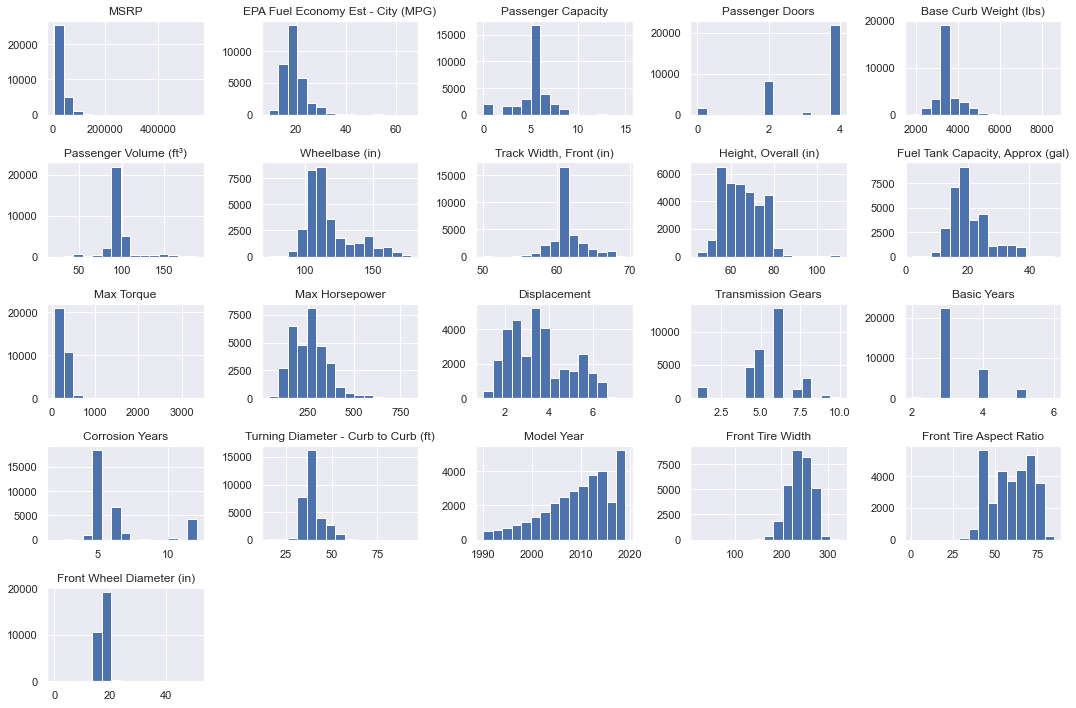

In [247]:
# Quick histograms again of all the numeric features
df_cars.hist(bins = 15, figsize = (15,10))
plt.tight_layout()
plt.show()

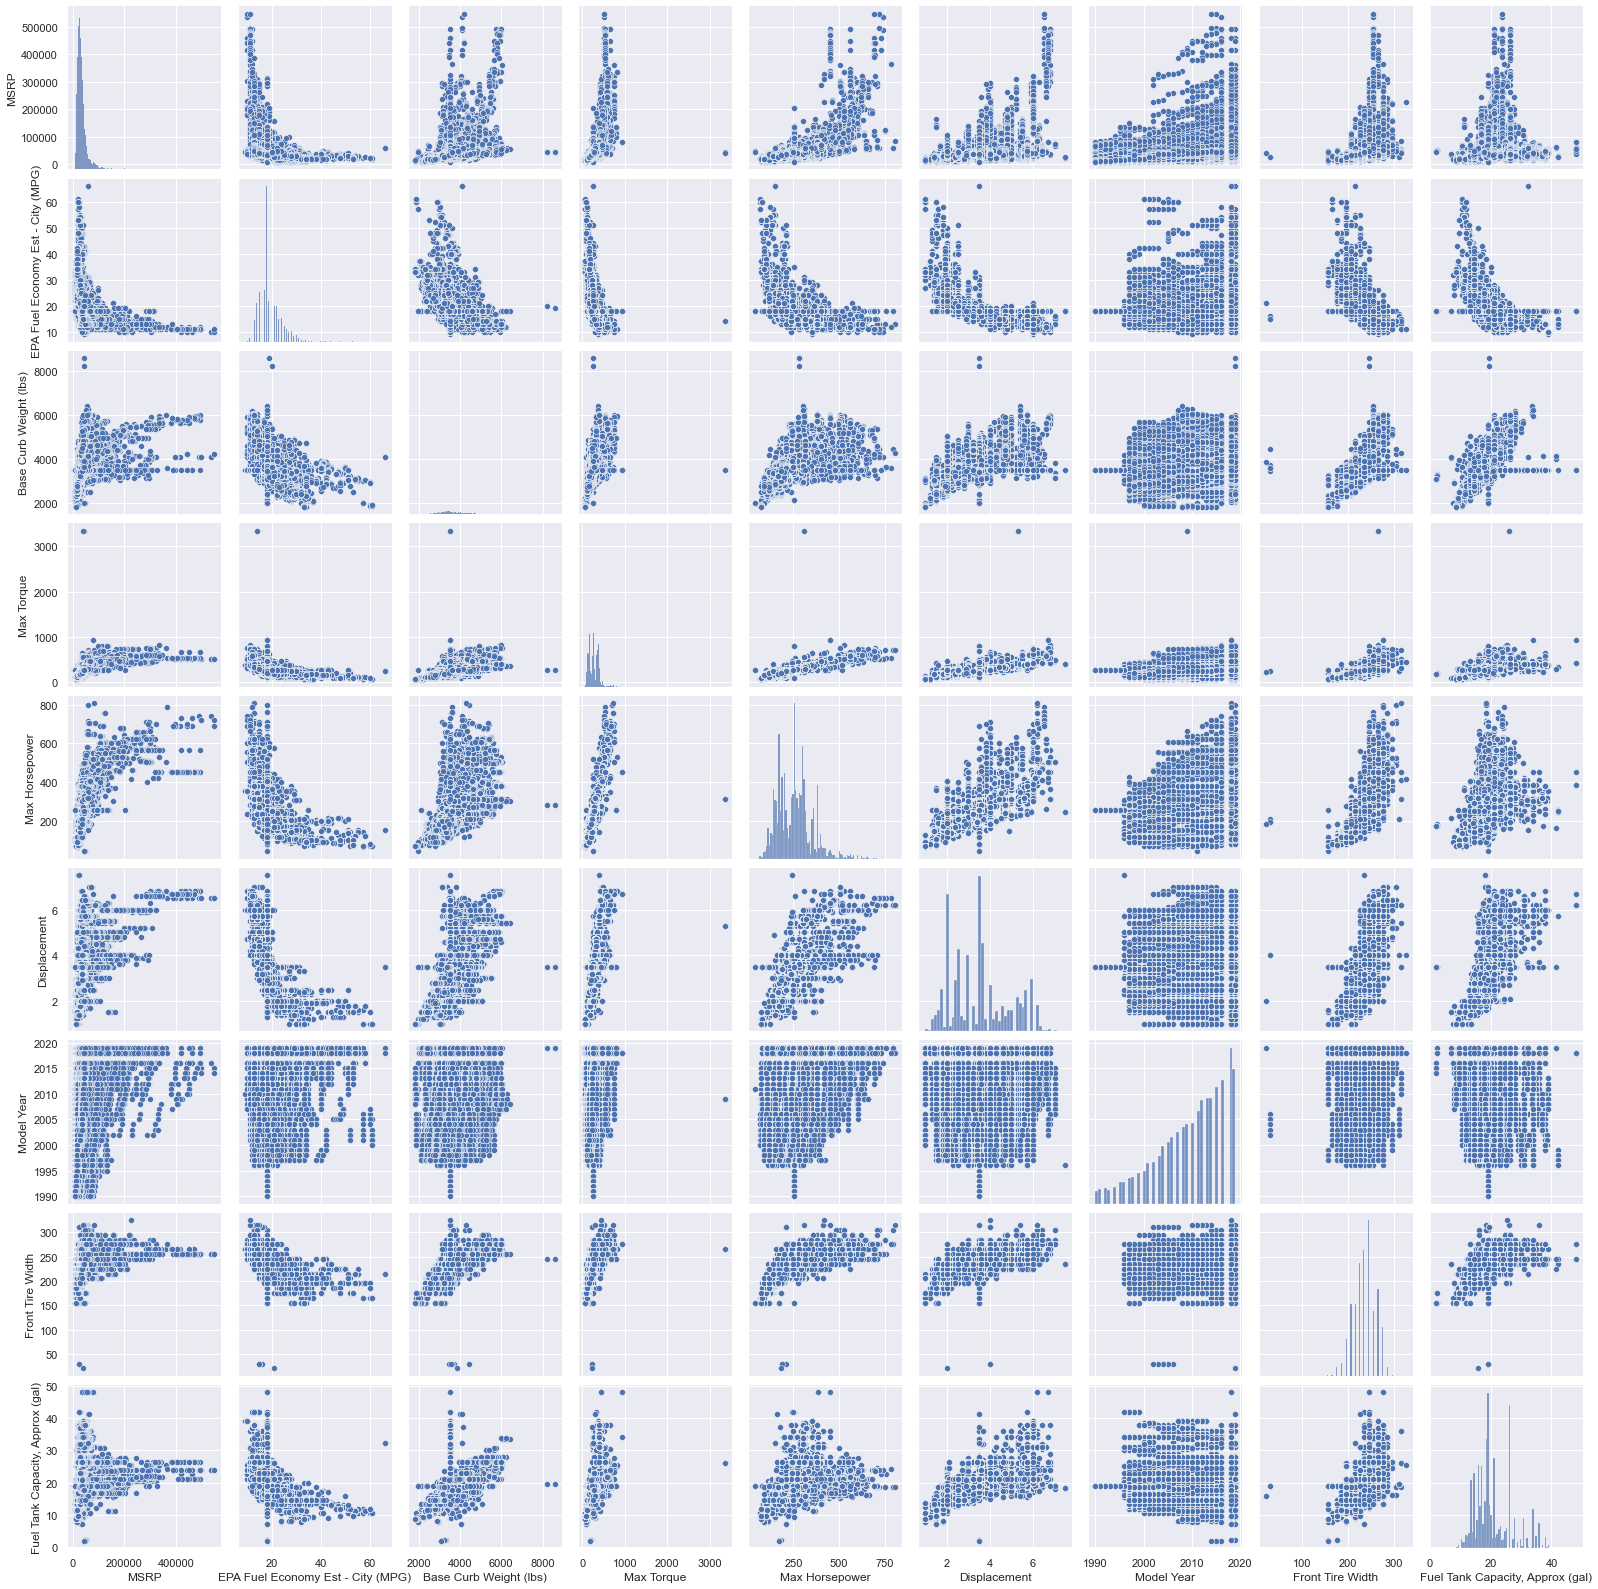

In [250]:
# Create a pairplot of our numeric features (some less important features omitted to keep plot reasonably sized)
var_list = ['MSRP', 'EPA Fuel Economy Est - City (MPG)', 'Base Curb Weight (lbs)', 'Max Torque', 'Max Horsepower', 'Displacement', 'Model Year', 'Front Tire Width', 'Fuel Tank Capacity, Approx (gal)']
sns.pairplot(df_cars, vars = var_list)
plt.show()

In [269]:
# Overall the pairplot looks fine, but I see a few clearly odd looking outliers including in 'Max Torque', lets investigate
df_cars[df_cars['Max Torque'] > 1000].T

5725         5726
MSRP                                        42040        39515
EPA Fuel Economy Est - City (MPG)              14           14
Propulsion Source                             Gas          Gas
Drivetrain                                    RWD          RWD
Passenger Capacity                              8            8
Passenger Doors                                 4            4
Body Style                                    SUV          SUV
Base Curb Weight (lbs)                     3500.5       3500.5
Passenger Volume (ft³)                       97.5         97.5
Wheelbase (in)                                116          116
Track Width, Front (in)                      61.6         61.6
Height, Overall (in)                         76.9         76.9
Fuel Tank Capacity, Approx (gal)               26           26
Max Torque                                   3350         3350
Fuel System                                   SFI          SFI
Max Horsepower                                310          310
Displacement                                  5.3          5.3
Transmission Type                       Automatic    Automatic
Transmission Gears                              6            6
Suspension Type - Front               Coil Spring  Coil Spring
Suspension Type - Rear                      Other        Other
Air Bag-Frontal-Driver                        Yes          Yes
Air Bag-Frontal-Passenger                     Yes          Yes
Air Bag-Passenger Switch (On/Off)              No           No
Air Bag-Side Body-Front                        No           No
Air Bag-Side Body-Rear                         No           No
Air Bag-Side Head-Front                       Yes          Yes
Air Bag-Side Head-Rear                        Yes          Yes
Brakes-ABS                                    Yes          Yes
Child Safety Rear Door Locks                   No           No
Daytime Running Lights                        Yes          Yes
Traction Control                              Yes          Yes
Night Vision                                   No           No
Rollover Protection Bars                       No           No
Fog Lamps                                     Yes          Yes
Parking Aid                                   Yes           No
Tire Pressure Monitor                         Yes          Yes
Back-Up Camera                                 No           No
Stability Control                             Yes          Yes
Basic Miles/km                             36,000       36,000
Basic Years                                     3            3
Corrosion Miles/km                        100,000      100,000
Corrosion Years                                 6            6
Drivetrain Miles/km                       100,000      100,000
Drivetrain Years                                5            5
Turning Diameter - Curb to Curb (ft)           39           39
Front Wheel Material                     Aluminum     Aluminum
Roadside Assistance Years                     5.0          5.0
Roadside Assistance Miles/km              100,000      100,000
Model Year                                   2009         2009
Manufacturer                            Chevrolet    Chevrolet
Car Model                                   Tahoe        Tahoe
Engine Type                                    V8           V8
Front Tire Width                              265          265
Front Tire Aspect Ratio                        70           70
Front Wheel Diameter (in)                      17           17
Engine Compression                       NA/other     NA/other

In [270]:
# The values our clearly one unit too large, varified by checking actual torque values, so we fix those next
df_cars.loc[5725, 'Max Torque'] = 335
df_cars.loc[5726, 'Max Torque'] = 335

In [272]:
# A few 'front tire width' values appear to be improbably small as well
df_cars[df_cars['Front Tire Width'] < 50]

MSRP  EPA Fuel Economy Est - City (MPG) Propulsion Source  \
17848  24295.0                               15.0               Gas   
17858  23895.0                               15.0               Gas   
17859  24385.0                               16.0               Gas   
17863  25275.0                               16.0               Gas   
17869  24635.0                               15.0               Gas   
17870  23650.0                               15.0               Gas   
30497  38895.0                               21.0               Gas   

      Drivetrain  Passenger Capacity  Passenger Doors Body Style  \
17848        4WD                   4                2        SUV   
17858        4WD                   4                2        SUV   
17859        4WD                   4                2        SUV   
17863        4WD                   4                2        SUV   
17869        4WD                   4                2        SUV   
17870        4WD                   4                2        SUV   
30497        AWD                   5                4        SUV   

       Base Curb Weight (lbs)  Passenger Volume (ft³)  Wheelbase (in)  ...  \
17848                  3721.0                    65.6           103.4  ...   
17858                  3555.0                    65.6           103.4  ...   
17859                  3445.0                    94.1           103.4  ...   
17863                  3593.0                    51.4            93.4  ...   
17869                  3575.0                    93.8            93.4  ...   
17870                  4450.0                    51.4            93.4  ...   
30497                  3858.0                   101.1           109.8  ...   

       Roadside Assistance Years  Roadside Assistance Miles/km  Model Year  \
17848                    Missing                       Missing        2006   
17858                          3                        36,000        2005   
17859                          3                        36,000        2004   
17863                          3                        36,000        2004   
17869                          3                        36,000        2003   
17870                          3                        36,000        2002   
30497                        3.0                        36,000        2019   

       Manufacturer Car Model  Engine Type  Front Tire Width  \
17848          Jeep  Wrangler           I6              30.0   
17858          Jeep  Wrangler           I6              30.0   
17859          Jeep  Wrangler           I6              30.0   
17863          Jeep  Wrangler           I6              30.0   
17869          Jeep  Wrangler           I6              30.0   
17870          Jeep  Wrangler           I6              30.0   
30497    Volkswagen    Tiguan           I4              20.0   

      Front Tire Aspect Ratio  Front Wheel Diameter (in) Engine Compression  
17848                     9.0                       51.0           NA/other  
17858                     9.0                       51.0           NA/other  
17859                     9.0                       51.0           NA/other  
17863                     9.0                       51.0           NA/other  
17869                     9.0                       51.0           NA/other  
17870                     9.0                       51.0           NA/other  
30497                    60.0                       17.0       Turbocharged  

[7 rows x 57 columns]

In [273]:
# These values are not correct or may use a different measuring system/unit. Lets fill in the values with the median
rows = [17848, 17858, 17859, 17863, 17869, 17870, 30497]

for i in rows:
    df_cars.loc[i, 'Front Tire Width'] = df_cars['Front Tire Width'].median()


In [274]:
# There are also a few curb weights that seem a bit high
df_cars[df_cars['Base Curb Weight (lbs)'] > 8000]

MSRP  EPA Fuel Economy Est - City (MPG) Propulsion Source  \
14603  44720.0                               19.0               Gas   
14610  42820.0                               20.0               Gas   

      Drivetrain  Passenger Capacity  Passenger Doors Body Style  \
14603        AWD                   7                4        SUV   
14610        FWD                   7                4        SUV   

       Base Curb Weight (lbs)  Passenger Volume (ft³)  Wheelbase (in)  ...  \
14603                  8591.0                   153.1           111.0  ...   
14610                  8232.0                   153.1           111.0  ...   

       Roadside Assistance Years  Roadside Assistance Miles/km  Model Year  \
14603                        3.0                        36,000        2019   
14610                        3.0                        36,000        2019   

       Manufacturer Car Model  Engine Type  Front Tire Width  \
14603         Honda     Pilot           V6             245.0   
14610         Honda     Pilot           V6             245.0   

      Front Tire Aspect Ratio  Front Wheel Diameter (in) Engine Compression  
14603                    50.0                       20.0           NA/other  
14610                    50.0                       20.0           NA/other  

[2 rows x 57 columns]

In [275]:
# Once again these values are not correct, will simply look up the true values and insert since there are only two
df_cars.loc[14603, 'Base Curb Weight (lbs)'] = 4319
df_cars.loc[14610, 'Base Curb Weight (lbs)'] = 4036

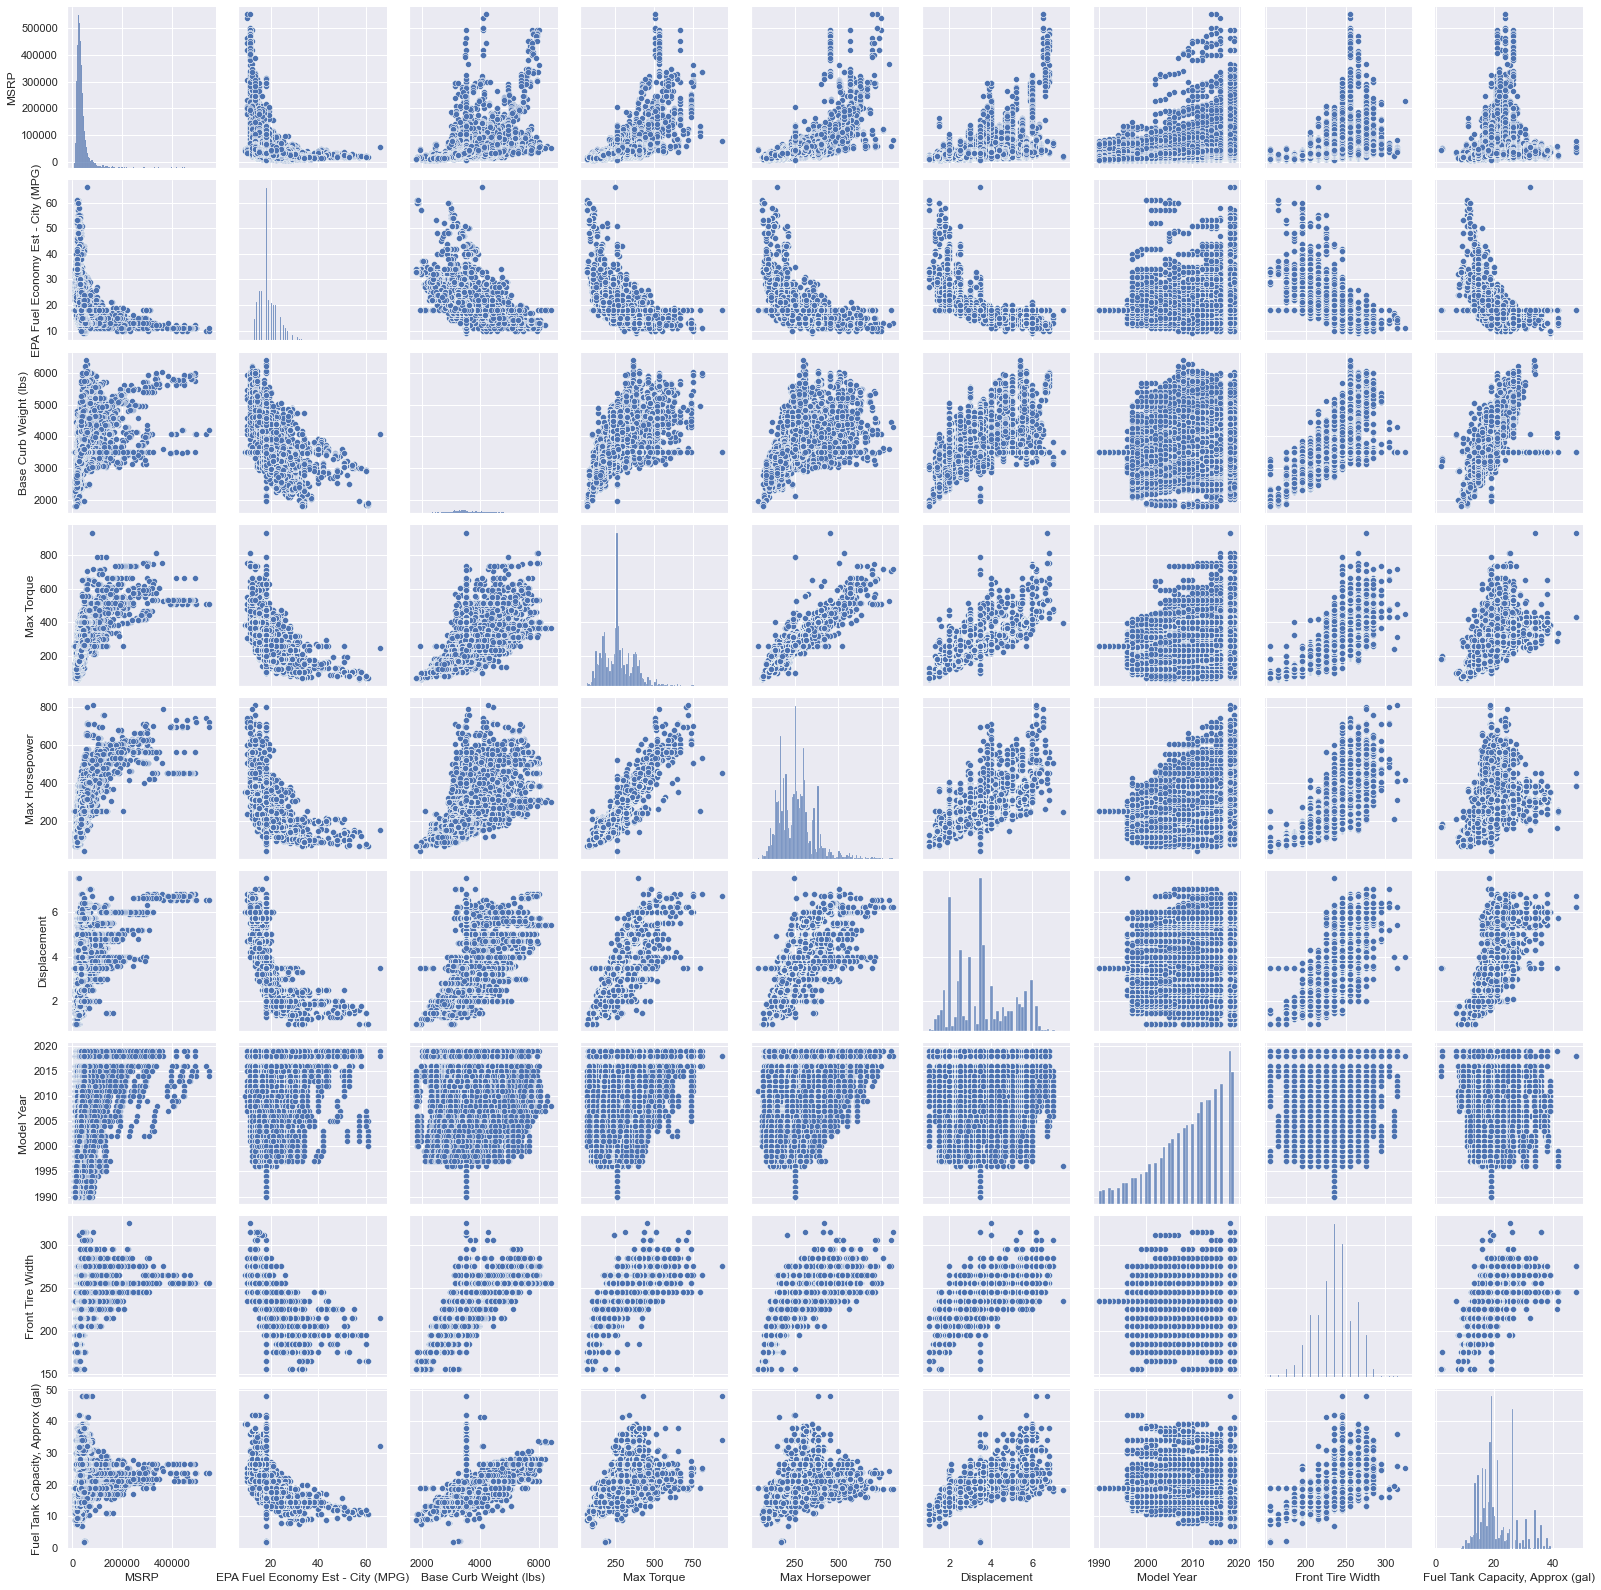

In [276]:
# Lets redo the pairplots now
sns.pairplot(df_cars, vars = var_list)
plt.show()

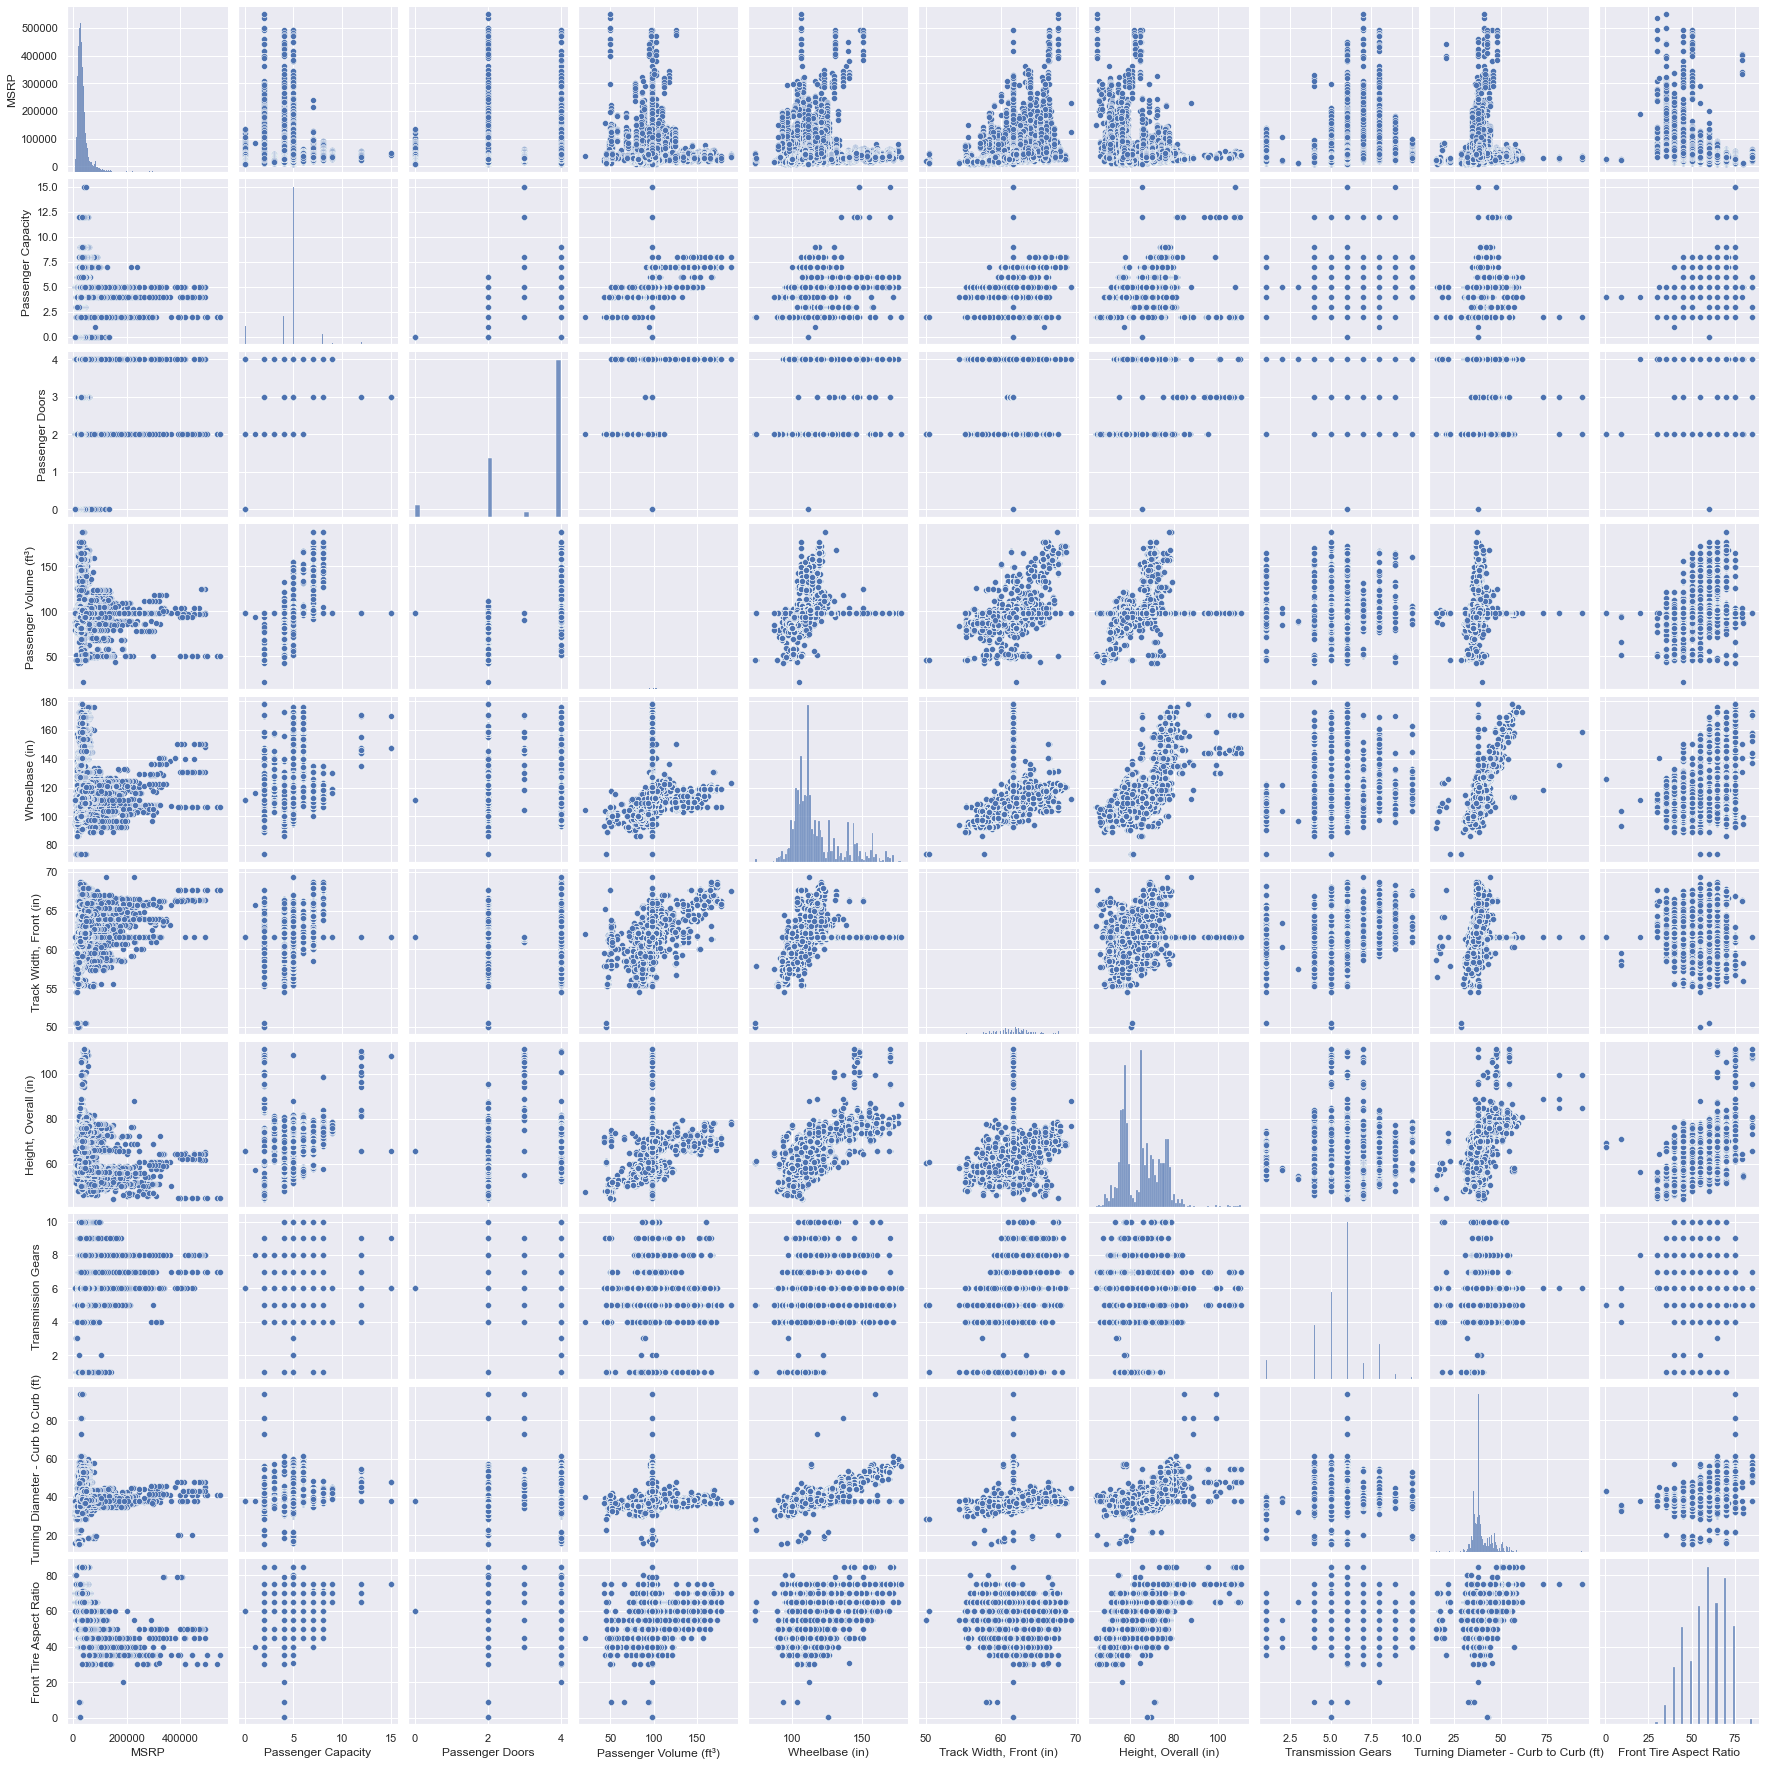

In [277]:
# For completeness lets do pairplots of all the other numeric features as well as 'MSRP'
var_list2 = ['MSRP', 'Passenger Capacity', 'Passenger Doors', 'Passenger Volume (ft³)', 'Wheelbase (in)', 'Track Width, Front (in)', 'Height, Overall (in)', 'Transmission Gears', 'Turning Diameter - Curb to Curb (ft)', 'Front Tire Aspect Ratio']
sns.pairplot(df_cars, vars = var_list2)
plt.show()

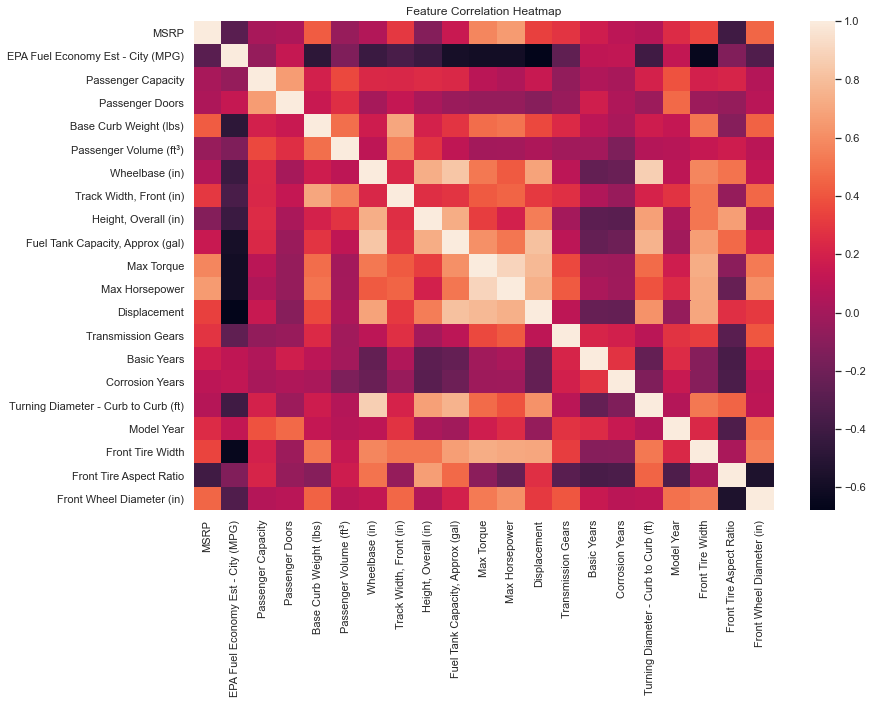

In [249]:
# Check for correlations within our numeric features, particularly between our target feature and the rest, with a heatmap
plt.figure(figsize = (13, 9))
sns.heatmap(df_cars.corr())
plt.title('Feature Correlation Heatmap')
plt.show()

The heatmap shows some positive correlations of our target feature ('MSRP') with several features that make intuitive sense.  We see the most correlation with 'Max Horsepower','Max Torque' and 'Base Curb Weight' all of which align with expectations.  Along with those we also see some correlation with features such as 'Displacement', 'Transmission Gears' and 'Model Year' among several others.  There are a few minor surprises here though, such as the slight negative correlation of our target feature with car size related features such as height, volume, number of doors, and capacity.  I would have thought that generally bigger cars would be more expensive (excluding outliers such as exotic and/or supercars).  Overall though the heatmap makes the dataset seem solid and doesn't throw up any obvious red flags.

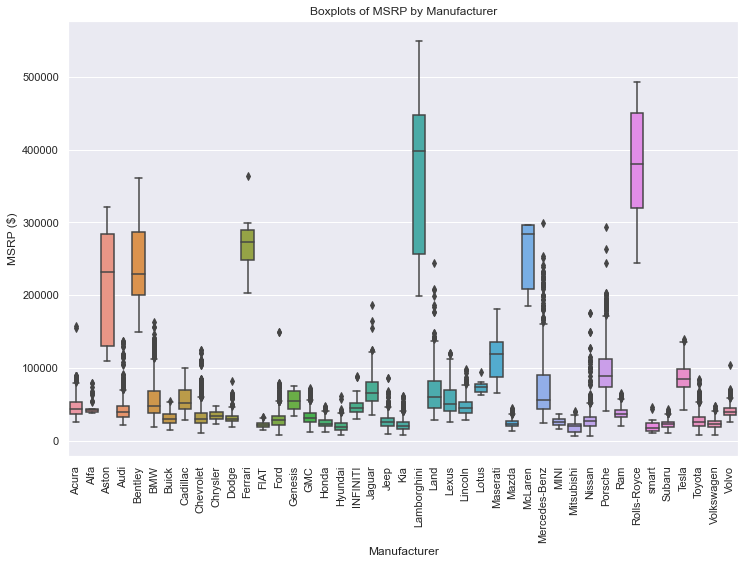

In [256]:
# Lets make some boxplots of our target feature and a few of what I believe are especially important categorical features
plt.subplots(figsize=(12, 8))
sns.boxplot(x='Manufacturer', y='MSRP', data=df_cars)
plt.xticks(rotation='vertical')
plt.ylabel('MSRP ($)')
plt.xlabel('Manufacturer')
plt.title('Boxplots of MSRP by Manufacturer')
plt.show()

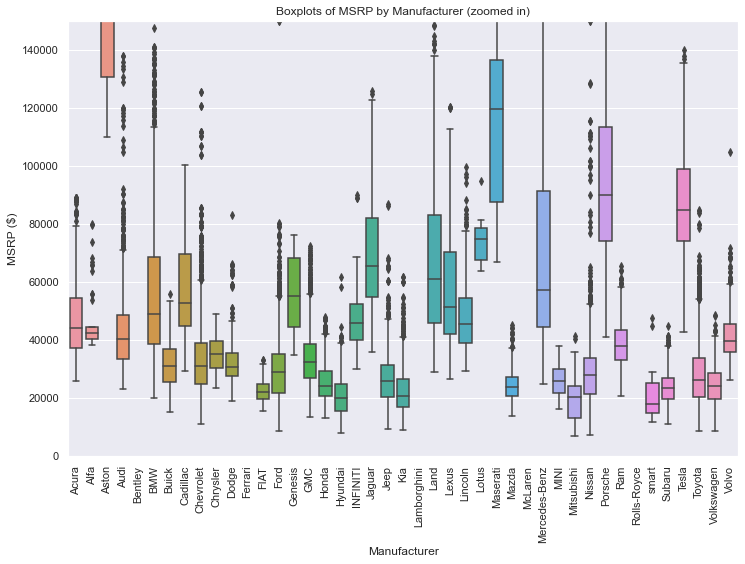

In [255]:
plt.subplots(figsize=(12, 8))
ax = sns.boxplot(x='Manufacturer', y='MSRP', data=df_cars)
plt.xticks(rotation='vertical')
plt.ylabel('MSRP ($)')
ax.set(ylim=(0, 150000))
plt.xlabel('Manufacturer')
plt.title('Boxplots of MSRP by Manufacturer (zoomed in)')
plt.show()

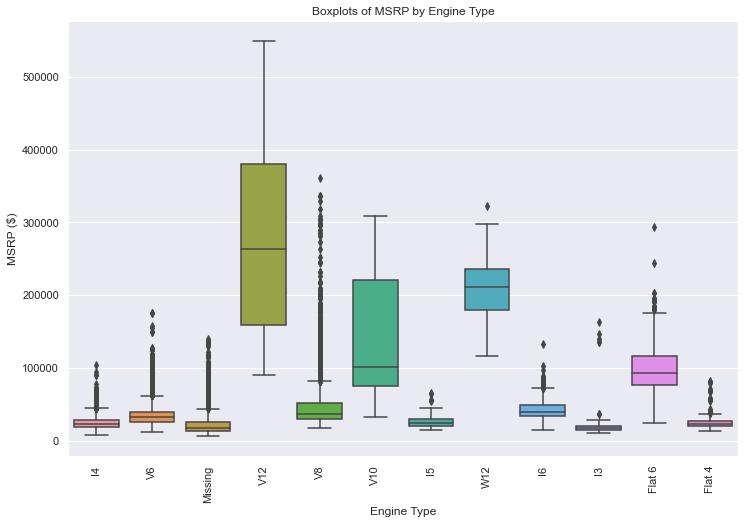

In [257]:
plt.subplots(figsize=(12, 8))
sns.boxplot(x='Engine Type', y='MSRP', data=df_cars)
plt.xticks(rotation='vertical')
plt.ylabel('MSRP ($)')
plt.xlabel('Engine Type')
plt.title('Boxplots of MSRP by Engine Type')
plt.show()

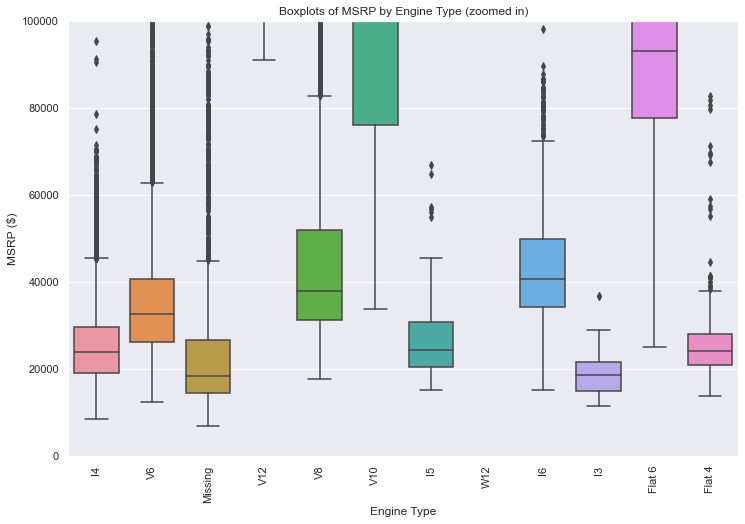

In [258]:
plt.subplots(figsize=(12, 8))
ax1 = sns.boxplot(x='Engine Type', y='MSRP', data=df_cars)
plt.xticks(rotation='vertical')
plt.ylabel('MSRP ($)')
ax1.set(ylim=(0, 100000))
plt.xlabel('Engine Type')
plt.title('Boxplots of MSRP by Engine Type (zoomed in)')
plt.show()

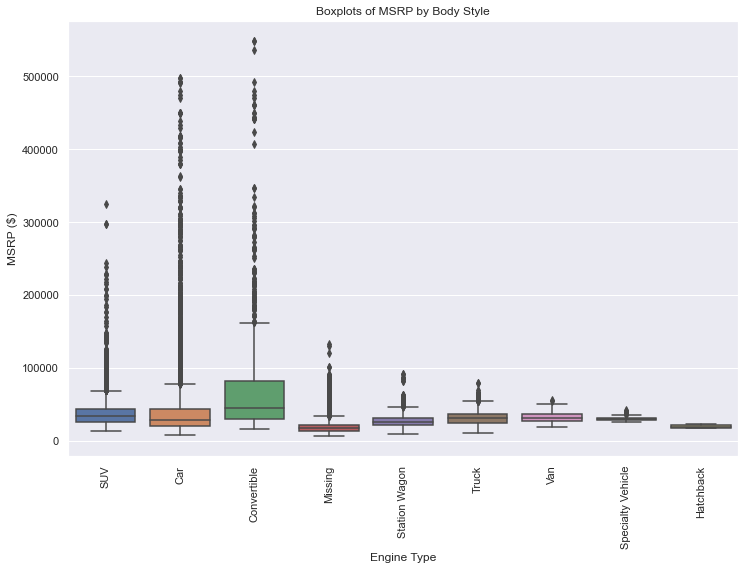

In [259]:
plt.subplots(figsize=(12, 8))
sns.boxplot(x='Body Style', y='MSRP', data=df_cars)
plt.xticks(rotation='vertical')
plt.ylabel('MSRP ($)')
plt.xlabel('Body Style')
plt.title('Boxplots of MSRP by Body Style')
plt.show()

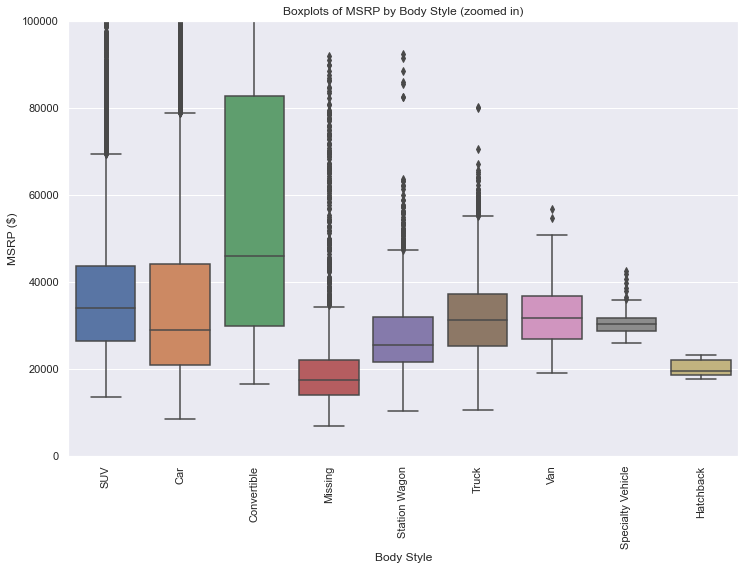

In [260]:
plt.subplots(figsize=(12, 8))
ax2 = sns.boxplot(x='Body Style', y='MSRP', data=df_cars)
plt.xticks(rotation='vertical')
plt.ylabel('MSRP ($)')
ax2.set(ylim=(0, 100000))
plt.xlabel('Body Style')
plt.title('Boxplots of MSRP by Body Style (zoomed in)')
plt.show()

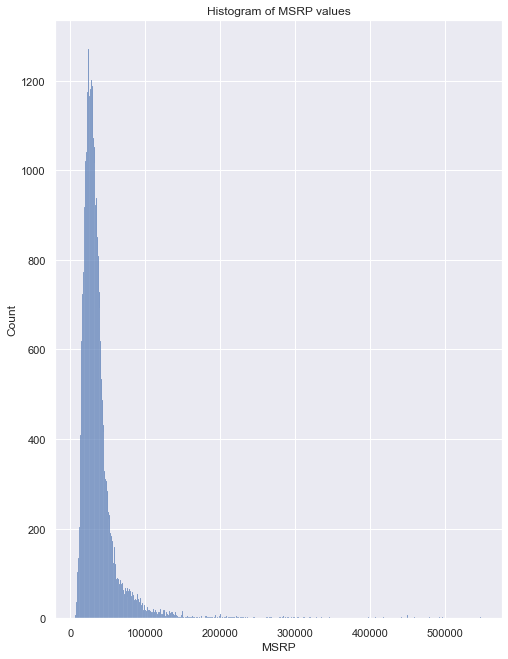

In [290]:
# Finally lets just take final look at the histogram of our target feature
plt.figure(figsize = (8, 11))
hist_msrp = sns.histplot(data = df_cars, x = 'MSRP')
plt.title('Histogram of MSRP values')
plt.show()

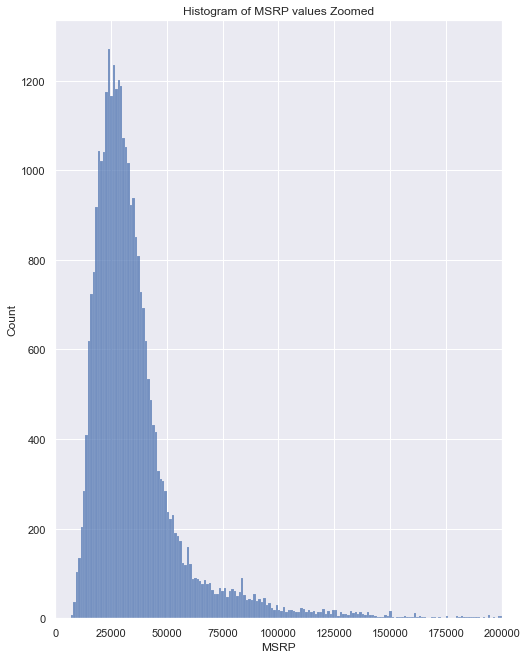

In [292]:
# Set x limits to get a better look at the majority of the distribution
plt.figure(figsize = (8, 11))
hist_msrp = sns.histplot(data = df_cars, x = 'MSRP')
plt.title('Histogram of MSRP values Zoomed')
hist_msrp.set_xlim(0, 200000)
plt.show()

In [296]:
df_cars.head()

MSRP  EPA Fuel Economy Est - City (MPG) Propulsion Source Drivetrain  \
0  40600.0                               22.0               Gas        FWD   
1  45500.0                               22.0               Gas        FWD   
2  43600.0                               22.0               Gas        FWD   
3  37400.0                               22.0               Gas        FWD   
4  42600.0                               21.0               Gas        AWD   

   Passenger Capacity  Passenger Doors Body Style  Base Curb Weight (lbs)  \
0                   5                4        SUV                  3790.0   
1                   5                4        SUV                  3829.0   
2                   5                4        SUV                  3821.0   
3                   5                4        SUV                  3783.0   
4                   5                4        SUV                  4026.0   

   Passenger Volume (ft³)  Wheelbase (in)  ...  Roadside Assistance Years  \
0                   104.0           108.3  ...                        4.0   
1                   104.0           108.3  ...                        4.0   
2                   104.0           108.3  ...                        4.0   
3                   104.0           108.3  ...                        4.0   
4                   104.0           108.3  ...                        4.0   

   Roadside Assistance Miles/km  Model Year  Manufacturer Car Model  \
0                        50,000        2019         Acura       RDX   
1                        50,000        2019         Acura       RDX   
2                        50,000        2019         Acura       RDX   
3                        50,000        2019         Acura       RDX   
4                        50,000        2019         Acura       RDX   

   Engine Type  Front Tire Width Front Tire Aspect Ratio  \
0           I4             235.0                    55.0   
1           I4             235.0                    55.0   
2           I4             255.0                    45.0   
3           I4             235.0                    55.0   
4           I4             235.0                    55.0   

   Front Wheel Diameter (in) Engine Compression  
0                       19.0       Turbocharged  
1                       19.0       Turbocharged  
2                       20.0       Turbocharged  
3                       19.0       Turbocharged  
4                       19.0       Turbocharged  

[5 rows x 57 columns]

In [298]:
df_cars.describe()

MSRP  EPA Fuel Economy Est - City (MPG)  Passenger Capacity  \
count   32262.000000                       32262.000000        32262.000000   
mean    37707.459426                          19.305338            4.762972   
std     32392.375762                           5.140457            1.825248   
min      6929.000000                           9.000000            0.000000   
25%     23140.000000                          16.000000            4.000000   
50%     30557.500000                          18.000000            5.000000   
75%     40758.750000                          21.000000            5.000000   
max    548800.000000                          66.000000           15.000000   

       Passenger Doors  Base Curb Weight (lbs)  Passenger Volume (ft³)  \
count     32262.000000            32262.000000            32262.000000   
mean          3.262972             3566.726617               99.040517   
std           1.155429              539.617801               15.874106   
min           0.000000             1808.000000               21.280000   
25%           2.000000             3384.000000               97.100000   
50%           4.000000             3500.500000               97.500000   
75%           4.000000             3642.750000               97.700000   
max           4.000000             6406.000000              188.400000   

       Wheelbase (in)  Track Width, Front (in)  Height, Overall (in)  \
count    32262.000000             32262.000000          32262.000000   
mean       117.462180                61.650681             65.310563   
std         17.568642                 2.072746              9.005111   
min         73.500000                50.000000             44.300000   
25%        105.900000                61.000000             57.700000   
50%        111.500000                61.600000             65.500000   
75%        125.900000                62.100000             72.500000   
max        178.000000                69.400000            110.800000   

       Fuel Tank Capacity, Approx (gal)  ...  Max Horsepower  Displacement  \
count                      32262.000000  ...    32262.000000  32262.000000   
mean                          20.635931  ...      257.995847      3.541433   
std                            6.169331  ...       95.352637      1.364767   
min                            1.900000  ...       40.000000      1.000000   
25%                           16.400000  ...      184.000000      2.400000   
50%                           19.000000  ...      252.000000      3.500000   
75%                           24.600000  ...      305.000000      4.600000   
max                           48.000000  ...      808.000000      7.500000   

       Transmission Gears   Basic Years  Corrosion Years  \
count        32262.000000  32262.000000     32262.000000   
mean             5.521201      3.372823         6.214153   
std              1.583984      0.647980         2.372710   
min              1.000000      2.000000         2.000000   
25%              5.000000      3.000000         5.000000   
50%              6.000000      3.000000         5.000000   
75%              6.000000      4.000000         6.000000   
max             10.000000      6.000000        12.000000   

       Turning Diameter - Curb to Curb (ft)    Model Year  Front Tire Width  \
count                          32262.000000  32262.000000      32262.000000   
mean                              39.548749   2009.523836        235.444672   
std                                5.508204      7.198314         23.423927   
min                               15.400000   1990.000000        155.000000   
25%                               36.100000   2005.000000        225.000000   
50%                               38.100000   2011.000000        235.000000   
75%                               41.300000   2015.000000        245.000000   
max                               93.600000   2019.000000        325.000000   

       Front Tire Aspect Ratio  

In [299]:
# Save a new file for next step
df_cars.to_csv('new_cars_cleaned.csv', index = False)